# Intelligent systems for bioinformatics- Group 1

This work is developed in the ambit of curricular unit intelligent systems for bioinformatics of the Bioinformatic Master by:
- [Beatriz Santos](https://github.com/beatrizsantos1607) (pg46723)
- [Duarte Velho](https://github.com/duartebred) (pg53481)
- [Ricardo Oliveira](https://github.com/ricardofoliveira61) (pg53501)
- [Rita Nóbrega](https://github.com/ritanobrega00) (pg46733)
- [Rodrigo Esperança](https://github.com/esperancaa) (pg50923)

This work consists in the analysis of a dataset through the utilization of machine learning algorithms, recurring to Python as the programming language.
The entire analysis is present on a Jupyter Notebook, organized in sections (explained later on) containing succinct explanations of the procedures and decisions taken throughout the analysis.

For this work we selected the [GDSC1](https://tdcommons.ai/multi_pred_tasks/drugres) dataset. This dataset contains the wet lab IC50 for 208 drugs in 1000 cancer cells lines and can be used to design models that can predict drug response since the same compound can have different levels of responses in different patients. With this we aim to design a model that given a pair of drug and cell line genomics profile can predict the drug response and find the best drug to treat certain patient. In this dataset the RMD normalized gene expression was used for cancer lines and the SMILES for drugs. Y is the log normalized IC50.

## Notebook sections
### 1. Preprocessing and data exploration
- Review of all documentation available about the dataset
- Load the dataset and realize an exploratory analysis 
- Prepare the dataset with the generation and selection of features and treatment of the missing values 

This stage corresponds to the 1st section of the Notebook where:
- The dataset must the described according to the documentation
- Summarize the characteristics of the data through an exploratory analysis
- Description of the preprocessing steps justifying the choices
- Include graphics that represent the main characteristics of the dataset

### 2. Non-supervised learning
- Utilization of the adequate visualization and dimensionality reduction technique
-  Application of clustering methods

This stage corresponds to the section 2 of the Notebook where:
- The results must be analyzed and the procedures explain

### 3. Machine Learning
- Compare the behavior of different models/methods of machine learning through the calculation of the performance metrics
- Present the best model for the dataset

This stage correspond to the section 3 of the notebook and all the results must be reported and analyzed in a critical way

### 4. Deep Leaning
- Utilization of deep learning methods similarly to the stage 3

This stage correspond to the section 4 of the notebook and must report the results and have a critical analysis.

All the packages used during this work are listed on the cell below


In [63]:
from tdc.multi_pred import DrugRes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, Descriptors, AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import umap
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

## 1. Preprocessing and data exploration
 The first stage of this work consists of describing the dataset that is going to be used along the project. This stage is crucial to understand the data, its structure, its quality, and potential analysis. Let's start by reviewing all the available documentation.

 ### 1.1 Documentation review
 Recent studies have shown that alterations in cancer genomes influence the clinical response to anticancer therapies. Nowadays, genomic changes are used as molecular biomarkers to identify patients most likely to benefit from a treatment, however many cancer drugs in development or already in use have not been linked to a specific genomic marker that could guide their clinical use to diminish the time needed to treat a patient. 

 The discovery of cancer genome as a potential biomarker was only possible due to the advances in the recent years in high-throughput technologies, in particular, DNA sequencing technologies, that allow the sequencing on a scale that was previously unthinkable. To explore the increased knowledge of cancer genomics, preclinical studies that link the genomic complexity of cancer with functional readouts such as drug sensitivity are required. For these studies, cancer lines derived from many naturally occurring cancer types are essential to mimic the tissue type and genomic context of the cancer, and they also provide an easy system for experimental manipulation for molecular biology and drug discovery. For this reason, several studies have used cancer cell lines to link pharmacological data with genomic information and helped define therapeutic biomarkers as well as to demonstrate that pharmacogenomic profiling in cancer cell lines can be used as a biomarker discovery platform to guide the development of new cancer therapies.

The Genomics of Drug sensitivity in Cancer database, or GDSC for short, was designed to facilitate the study and understanding of the molecular features that influence drug response in cancer cell lines. The database holds datasets of drug sensitivity in cancer cells and links these data to detailed genomic information to facilitate the discovery of molecular biomarkers for drug response. These efforts are expected to, in a near future, provide a complete description of the genomic changes that occur in many cancer types
and profound insights into the origins, evolution and progression of cancer.

In order to download and load the dataset, we will use the `DrugRes` class from the `tdcommons.multi_pred` package. This package will facilitate data access to perform an initial analysis of the dataset, including its structure, format and content. The code presented below was used to download/load the dataset.


In [64]:
# download/load of the dataset and conversion to pandas.dataframe
data = DrugRes(name = 'GDSC1')
GDSC = data.get_data()
# download/load the gene symbols of the transciptomic profile
gene_symbols = data.get_gene_symbols()

# dataframe visualization
GDSC

Found local copy...
Loading...
Done!
Found local copy...
Loading...


,Drug_ID,Drug,Cell Line_ID,Cell Line,Y
0,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,MC-CAR,"[3.23827250519154, 2.98225419469807, 10.235490...",2.395685
1,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES3,"[8.690197905033282, 3.0914731119366, 9.9924871...",3.140923
2,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES5,"[8.233101127037282, 2.82468731112752, 10.01588...",3.968757
3,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES7,"[8.33346622426757, 3.9667571228514302, 9.79399...",2.692768
4,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,EW-11,"[8.39134072442845, 2.9683601858810698, 10.2606...",2.478678
...,...,...,...,...,...
177305,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-1040,"[8.65368534780164, 2.9238748715081, 10.1278774...",5.353963
177306,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-407,"[8.57966425274312, 2.77877087774424, 9.7680113...",4.820567
177307,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-61,"[8.077115751588071, 2.78132536810578, 10.03805...",5.785978
177308,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-81,"[7.7976988637889, 2.6408995410198797, 9.463400...",5.393454


In [65]:
data.print_stats()

--- Dataset Statistics ---
208 unique drugs.
958 unique cell lines.
177310 drug-cell line pairs.
--------------------------



The dataset download contains the cell line drug sensitivity data. This data was generated from ongoing high-throughput screening performed by the Cancer Genome Project at the Wellcome Trust Sanger Institute and the Center for Molecular Therapeutics at Massachusetts General Hospital.

This database is composed by 5 columns. The first column contains the name of the drug used on the screening, while the second column contains the 1D structure of the drug represented as a SMILES string. The compounds used during the screening are anticancer therapeutics encompassing both targeted agents and cytotoxic chemotherapeutics that are approved drugs already in use in the clinic or drugs undergoing clinical development and in clinical trials. The targeted drugs cover a wide range of targets and processes implicated in cancer biology including receptor tyrosine kinase signalling, cell cycle control, DNA damage response and the cytoskeleton.

The third column contains the name of the cell line used on the screening. The total collection of cell lines available for screening includes around 1000 different cancer cell lines that have been carefully selected to represent the spectrum of common and rare types of adult and childhood cancers of epithelial, mesenchymal and hematopoietic origin. The fourth column contains the raw mean difference (RMD) normalized gene expression profile data of the cell line when subjected to a specific anticancer drug in a vectorized format.

The last column corresponds to the cell line drug sensitivity values, which were measured using fluorescence-based cell viability assays after 72 hours of drug treatment, and dose-response curves were fitted to fluorescence signal intensities over nine drug concentrations. However, the values reported on the dataset are the normalized log values of the half maximal inhibitory concentration (IC50).

Is important to note that the current release of GDSC (3rd December of 2024) includes drug sensitivity data for 208 anticancer drugs and about 180000 cell line-drug interactions. This is the largest public resource available on drug sensitivity in cancer cells with ongoing screening with releases occurring every 4 months. Each new release these results are updated and new data for existing drug as well as data for new drugs screened is added.


In [66]:
# loading of extra information about the cell lines and drugs
cell_lines = pd.read_csv("data/Cell_listTue Dec 3 15_39_17 2024.csv")
drugs = pd.read_csv("data/Drug_listTue Dec 3 15_39_27 2024.csv")

# filtering the dataset to only include cell lines and drugs that are in the current release of GDSC1
## filtering cell lines
cell_line_idx = []
for cell_name in np.unique(GDSC["Cell Line_ID"]):
    idx = np.where(cell_lines["Cell line Name"]==cell_name)[0]
    if len(idx) != 0:
        cell_line_idx.append(idx[0])

cell_line_idx = np.array(cell_line_idx)
cell_line = cell_lines.iloc[cell_line_idx]

## filtering drugs
drug_idx = []
for drug_name in np.unique(GDSC["Drug_ID"]):
    idx = np.where(drugs[" Name"]==drug_name)[0]
    if len(idx) != 0:
        drug_idx.append(idx[0])

drug_idx = np.array(drug_idx)
drugs = drugs.iloc[drug_idx]
drugs = drugs.iloc[:,1:6]

print("Cell line data frame shape:",cell_line.shape)
print("Drug data frame shape:",drugs.shape)


Cell line data frame shape: (941, 8)
Drug data frame shape: (208, 5)


#### 1.1.1 Cell line information
On the code presented above extra information about the cell lines and the drugs used was loaded as pandas data frame. The original files were retrieved from the [GDSC website](https://www.cancerrxgene.org/). Afterward, both data frames were filtered to only include cell lines and drugs that are in the current release of GDSC1, since the datasets used comprise the information for either GDSC1 and GDSC2.

The cell line data frame is composed of 941 rows that represent all the cell lines, and 8 different columns. The first column contains the name attributed to each cell line, while the second and third columns contain the corresponding **Model ID** and **Cosmic ID**. The Model ID is a unique identifier used to represent a specific experimental model to track and link specific experimental setups across different databases and is particularly useful to organize and reference research data accurately, especially when comparing different cancer models and their responses to treatments or mutations. A Model ID number can be attributed to cell lines, genetically modified organisms, or organoids, however in our dataset the model ID refers only to cell lines. In addition, the Cosmic ID is a unique identifier assigned to a specific cell line in the Cosmic cell lines project, which is part of a larger Cosmic database that collects data on somatic mutations in cancer across a variety of tissues and conditions, being useful to more detailed information about a cell line, such as mutations, genomic profiles, etc.

The TCGA classification (4th column) categorizes the cancer types based on genomic data provided by **The Cancer Genome Atlas** project. This type of classification is more detailed than the traditional classification since it relies on molecular features, such as copy number alterations, gene expression, and chromosomal aberrations to group cancer into distinct subtypes instead of relying on pathological features. For example, the usage of the traditional classification can lead to different types of cancer such as Lung Squamous Cell Carcinoma and Lung Adenocarcinoma to be classified as lung cancer. However, the molecular profile allows the creation of more detailed subtypes of lung cancer, which considerably improved the understanding of cancer. In our dataset, there are present 31 unique TCGA classifications that can be used as input for machine learning models to uncover there is any relationship between the TCGA classification and drug sensitive.

The fifth and sixth columns represent the Tissue and Tissue subtype, respectively. The tissue column represents the system from where the cell line was obtained, while the tissue subtype column represents the specific subdivision of the tissue from where the cell line was obtained. In this dataset, the cell lines were obtained from 13 different tissues, and 55 different tissue subtypes.

The last two columns represent the dataset where the cell line can be found and the number of drugs tested for each cell line, respectively.


In [67]:
cell_line

,Cell line Name,Model ID,COSMIC ID,TCGA Classfication,Tissue,Tissue sub-type,Datasets,number of drugs
0,22RV1,SIDM00499,924100,PRAD,urogenital_system,prostate,GDSC1,353
2,23132-87,SIDM00980,910924,STAD,digestive_system,stomach,GDSC1,344
4,42-MG-BA,SIDM00982,687561,GBM,nervous_system,glioma,GDSC1,345
6,451Lu,SIDM01240,1287706,SKCM,skin,melanoma,GDSC1,352
8,5637,SIDM00807,687452,BLCA,urogenital_system,bladder,GDSC1,347
...,...,...,...,...,...,...,...,...
1929,YT,SIDM00410,946358,ALL,blood,lymphoid_neoplasm_other,GDSC1,387
1931,ZR-75-30,SIDM00971,909907,BRCA,breast,breast,GDSC1,341
1933,huH-1,SIDM00586,1298146,LIHC,digestive_system,liver,GDSC1,352
1935,no-10,SIDM00574,908452,LGG,nervous_system,glioma,GDSC1,393


#### 1.1.2 Drug information

The drug data frame is composed of 208 rows that represent all the drugs used on the study, and 5 different columns. The first column contains the name attributed to each drug, while the second contains other synonyms used to refer to the drug. The third column (Targets) contains the information about the target which the drug was designed to affect. The **target pathway** column stores the infromation about the pathway affected by the drug giving information of which pathway is going to be affected by the treatment. The last column contains the PubChem ids to gather more information about the compounds to perform a more in depth analysis of each drug.

In [68]:
drugs

,Name,Synonyms,Targets,Target pathway,PubCHEM
0,(5Z)-7-Oxozeaenol,"5Z-7-Oxozeaenol, LL-Z1640-2",TAK1,"Other, kinases",9863776
4,5-Fluorouracil,5-FU,Antimetabolite (DNA & RNA),Other,3385
20,A-443654,KIN001-139,"AKT1, AKT2, AKT3",PI3K/MTOR signaling,10172943
21,A-770041,KIN001-111,"LCK, FYN","Other, kinases",9549184
29,AICA Ribonucleotide,"AICAR, N1-(b-D-Ribofuranosyl)-5-aminoimidazole...",AMPK agonist,Metabolism,65110
...,...,...,...,...,...
683,YM201636,"YM-201636, YM 201636",PIKFYVE,PI3K/MTOR signaling,9956222
684,Z-LLNle-CHO,"Z-L-Norleucine-CHO, Gamma-Secretase Inhibitor 1",gamma-secretase,Other,16760646
688,ZM447439,"ZM-447439, ZM 447439","AURKA, AURKB",Mitosis,9914412
690,ZSTK474,"KIN001-167, ZSTK-474, ZSTK 474",PI3K (class 1),PI3K/MTOR signaling,11647372


### 1.2 Dataset exploration and preparation

Data exploration and preparation is a vital aspect on ML workflow since ML is a data-driven approach and thereby the quality of the dataset choosen is going to have a direct impact on the performance and generalization ability of the model. We are going to start by exploring the cell line information to identify potential characteristics that can be useful later on and to remove noise or missing data

#### 1.2.1 Cell line data exploration

The number of drugs tested for each cell line is a important factor that needs to be taken into account since a low number of drugs tested can cause noise for the models instead of providing useful and valuable information.
Analysing the number of drugs tested for each cell line it is possible to see that the minimun value is 1. This can be problematic since a single drug test is not likely to provide enough information for a machine learning method to find meaninful patterns on the data. In addition, this data point can have a negative effect on the model, since it can be a source of noise and therefore must be removed.

On the other hand, we observed that the average number of drug tests for each cell line is around 346 with the maximum number being 403. However, this information alone is not enough to provide a general overview of the number of drug tested and therefore we generated a box plot to identify outliers that also contribute for the dataset noise.


In [69]:
cell_line.describe()[" number of drugs"]

count    941.000000
mean     346.339001
std       52.803075
min        1.000000
25%      342.000000
50%      350.000000
75%      386.000000
max      403.000000
Name:  number of drugs, dtype: float64

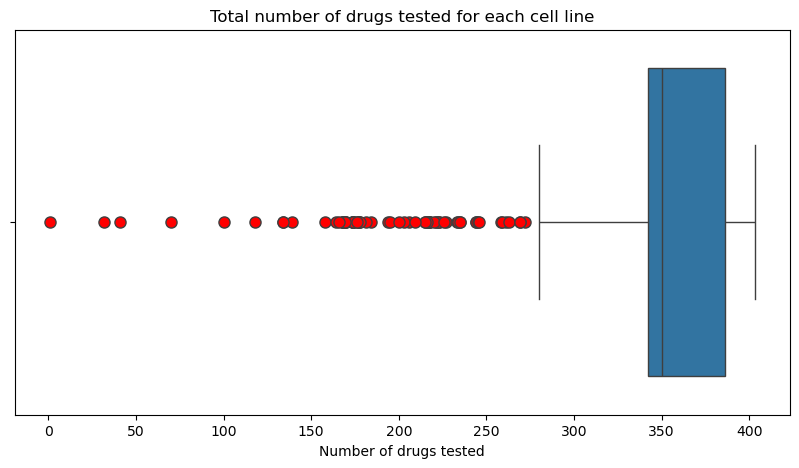

In [70]:
# define the size of the plot
plt.figure(figsize=(10, 5))
# create the boxplot highlighting the outliers with a red marker
sns.boxplot(data = cell_line, x=" number of drugs", orient="h",flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
# defines the title of the box plot
plt.title('Total number of drugs tested for each cell line')
# sets the x-axis label
plt.xlabel('Number of drugs tested')
# generates the plot
plt.show()

In [71]:
# calculates the 1st and 3rd quantile
Q1 = cell_line[" number of drugs"].quantile(0.25)
Q3 = cell_line[" number of drugs"].quantile(0.75)

# calculate the Interquartile range (IQR)
IQR = Q3 - Q1

# calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound_severe = Q1 - 3 * IQR
upper_bound_severe = Q3 + 3 * IQR


# Identify and count the number of outliers
num_outliers = len(cell_line[(cell_line[" number of drugs"] < lower_bound) | (cell_line[" number of drugs"] > upper_bound)])
severe_outliers = cell_line[(cell_line[" number of drugs"] < lower_bound_severe) | (cell_line[" number of drugs"] > upper_bound_severe)]

print(f"Number of outliers: {num_outliers}")
print(f"Number of severe outliers: {len(severe_outliers)}")


Number of outliers: 69
Number of severe outliers: 39


By analysing the box plot of the number of drugs tested for each cell lines is visiable the presence of outliers, more precisely 69 outliers. Outilers can have a significant impact on ML methods since they can impact model performance by increasing the variance of the model resulting in a model that does not generalize well to unseen data or that is overly influenced by the outliers increasing the model bias. To minimize the effects of the outliers on the final model, we defined that a good tradeoff between the number of outliers and the number of samples for training will be the removal of all severe outliers since some noise in the dataset can also be useful for the creation of robust models by forcing the model to focus on the most important patterns specially for more advanced ML methods such as deep learning. By following this approach, we were able to remove 39 severe outliers from the dataset retaining 902 cell lines.

Number of cell lines on the filtered cell line dataframe: 902
count    902.000000
mean     354.552106
std       34.425410
min      215.000000
25%      344.000000
50%      351.000000
75%      386.000000
max      403.000000
Name:  number of drugs, dtype: float64


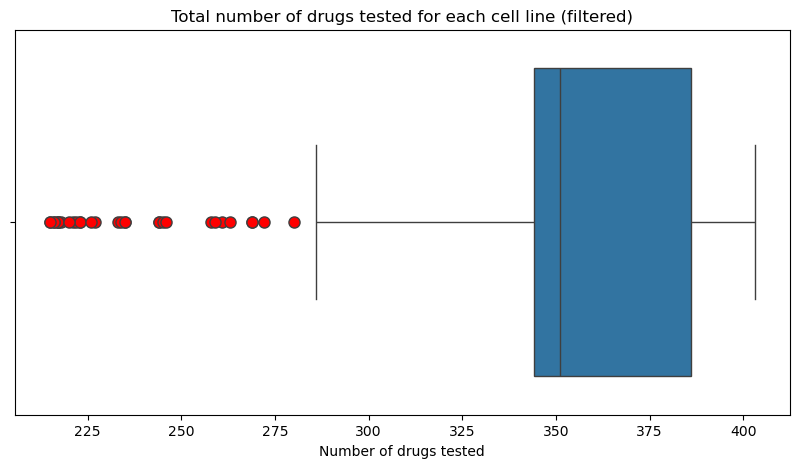

In [72]:
# removing the severe outliers from the cell line dataframe
filtered_cell_line = cell_line.drop(severe_outliers.index, inplace= False)

print("Number of cell lines on the filtered cell line dataframe:", filtered_cell_line.shape[0])
print(filtered_cell_line.describe()[" number of drugs"])

# define the size of the plot
plt.figure(figsize=(10, 5))
# create the boxplot highlighting the outliers with a red marker
sns.boxplot(data = filtered_cell_line, x=" number of drugs", orient="h",flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
# defines the title of the box plot
plt.title('Total number of drugs tested for each cell line (filtered)')
# sets the x-axis label
plt.xlabel('Number of drugs tested')
# generates the plot
plt.show()

The original dataset, as described above, do not contain a lot of features that can be used for model training. This can become a negative factor in the model performance since meaniful features are crucial to capture the underlying patterns present on the dataset during the training process. The lack of meaniful features is most likely going to result on a underfitted model with high bias and poor performance specially for complex relationships like the ones present on biological data where multiple factors influence the cell activities and biochemestry.
To overcome this limitation of our dataset and prevent underfitting we explored extra information about the cell lines that is not included on the original dataset. 

First, we looked into the TCGA classification data as a potential feature. The TCGA classification is based on extensive molecular profilling and thereby can provide biologically meaningful categories for each cell line that help ML models to learn patterns related to cancer behaviors to certain drug treatments. However, when we analised the TCGA classification of the filtered cell lines, we observed that around 20% of the cell lines have **unkown** TCGA classification. For this reason, we considered that the TCGA classification would not result in a valuable feature and would significantly reduce the number of examples that can be used to train the models resulting on a higher negative impacte than positive.


In [73]:
# gives the percentage of cell lines with a certain TCGA classification
filtered_cell_line[" TCGA Classfication"].value_counts(normalize= True)[0:5]

 TCGA Classfication
UNCLASSIFIED    0.188470
LUAD            0.066519
SKCM            0.056541
SCLC            0.055432
BRCA            0.052106
Name: proportion, dtype: float64

We therefore turned our attention to the tissue type from where the cell lines were extracted. This information is important because tissue types can influence the drug sensitivity of cancer due to molecular alterations in the cancer cells, since different tissues often have distinct mutations profiles and gene expression patterns that significally affect how cancer cells will respond to a specific drug. For this reason, tissue type is also a potential feature that can help the model capturing the hidden patterns of the cell lines that can be used to predict with more accuracy the drug sensitivity.

By explorating the tissue type information we observed that 100% of the cell lines have this information without the presence of missing values. By the pie plot visualization of the tissue type classification, we observed that our dataset covers common and rare types of cancer which is important to enhance ML generalization ability. However, some types of cancer, such as thyroid cancers (2%), do not have a significant representation in the data which can reduce the prediction accuracy of the model for this types of cancer. 
With this analysis, we decided that the tissue type has the potential to be a meaninful feature that will help ML models to capture the relationships between different types of cancer and drug sensitivity.

 Tissue
lung                    0.192905
blood                   0.165188
urogenital_system       0.108647
digestive_system        0.096452
nervous_system          0.090909
aero_digestive_tract    0.084257
skin                    0.059867
breast                  0.053215
bone                    0.039911
kidney                  0.035477
pancreas                0.034368
soft_tissue             0.022173
thyroid                 0.016630
Name: proportion, dtype: float64


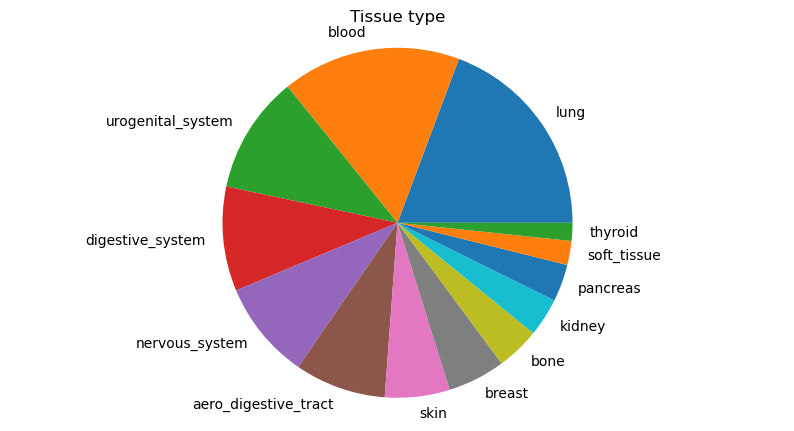

In [74]:
print(filtered_cell_line[" Tissue"].value_counts(normalize= True))

plt.figure(figsize=(10, 5))
# Create a pie chart
plt.pie(filtered_cell_line[" Tissue"].value_counts(normalize= True), labels = filtered_cell_line[" Tissue"].value_counts(normalize= True).index)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
# Defines the pieplot title
plt.title('Tissue type')
# Display the chart
plt.show()


Finally, we also considered the tissue sub-type as a potential feature. However, when we explored more in depth this information we detected some potential problems that made this characteristic less apealing to use as a feature. The main reasons for excluding this feature are data availability and dimensionality.

**Data availability** would probably become a problem in our future work since our dataset includes some rare types of cancer, such as adrenal gland cancer (less than 1% in our dataset), that are not commonly found. This problem will create a unbalanced dataset that will likely produce models that tend to overfitt to more common types of cancer, by the lack of data from rare types, resulting in model with lower generalization power.

**Dimensionality** would certanly become a hard problem to overcome, because in the human body there is a vast diversity of tissues sub-types, in our dataset we have 55 different tissue sub-types analysied. The incorporation of this information could lead to high-dimensional data which could result in models that have difficulties to learn meaningful information from the dataset without overfitting.

For the reasons presented above we decided that the utilization of tissue sub-type would bring more disadvantages than benefits


In [75]:
tissue_sub_type = filtered_cell_line["Tissue sub-type"].value_counts(normalize= True)

print("Number of different tissues sub-types:", len(np.unique(filtered_cell_line["Tissue sub-type"])))
print("\n","*************************")
print("Top 5 most commun tissue sub-types:\n",tissue_sub_type[0:5])
print("\n","*************************")
print("Top 5 most rare tissue sub-types:\n",tissue_sub_type[-5:])

Number of different tissues sub-types: 55

 *************************
Top 5 most commun tissue sub-types:
 Tissue sub-type
lung_NSCLC_adenocarcinoma    0.069845
melanoma                     0.056541
glioma                       0.055432
lung_small_cell_carcinoma    0.055432
breast                       0.053215
Name: proportion, dtype: float64

 *************************
Top 5 most rare tissue sub-types:
 Tissue sub-type
anaplastic_large_cell_lymphoma    0.002217
uterus                            0.002217
digestive_system_other            0.001109
lung_other                        0.001109
adrenal_gland                     0.001109
Name: proportion, dtype: float64


#### 1.2.2 Drug data exploration
The other important factor on the drug sensitivity of the cancer cell lines is the type of  drug used. The original dataset also does not provided a lot of meaningful information about the drugs used on this project so we decided to explore extra information about the drug used on this project. However, the drugs dataframe also does not provide meaningful information about the drugs. Similarly to tissue sub-types in cell lines, target information to each drug also presents dimensionality and data unbalance problems that prevent this feature to be used efficiently by the models during the training phase.

In [76]:
print("Number of unique drug tragets:",len(np.unique(drugs[" Targets"])))

Number of unique drug tragets: 172


The other potential feature that could be used is target pathway. This feature has 23 different pathways targeted by the 208 drugs used on this project. However, when analyzing the percentage of each pathway is visible that the drugs dataset is unbalanced and on top of that around 25% of the pathway data is not useful since it only refers to "others", something that won't be useful or give important highlights for the model.

This is a potential problem since we don't have enough information about the drugs used on the project that can be used as features to train ML models and learn the relationships between the drug characteristics and drug sensitivity of the cell lines. However, since we the SMILES representation of each drug is possible to generate useful features.

Number of unique drug traget pathways: 23

 *************************
Top 5 common targeted pathways:
  Target pathway
Other                  0.134615
Other, kinases         0.129808
RTK signaling          0.125000
PI3K/MTOR signaling    0.081731
ERK MAPK signaling     0.057692
Name: proportion, dtype: float64

 *************************
Top 5 most rare targeted pathways:
  Target pathway
Hormone-related                  0.009615
WNT signaling                    0.009615
ABL signaling                    0.009615
Chromatin histone methylation    0.009615
IGF1R signaling                  0.004808
Name: proportion, dtype: float64


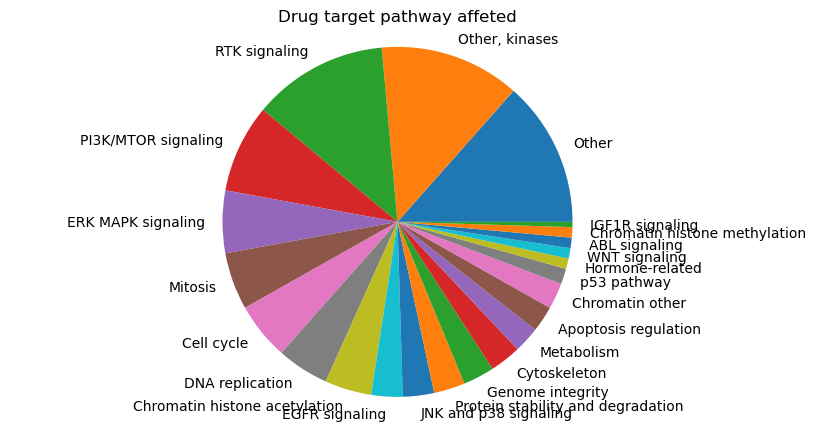

In [77]:
target_pathways = drugs[" Target pathway"].value_counts(normalize=True)

print("Number of unique drug traget pathways:", len(np.unique(drugs[" Target pathway"])))
print("\n","*************************")
print("Top 5 common targeted pathways:\n", target_pathways[0:5])
print("\n","*************************")
print("Top 5 most rare targeted pathways:\n",target_pathways[-5:])


plt.figure(figsize=(10, 5))
# Create a pie chart
plt.pie(drugs[" Target pathway"].value_counts(normalize=True), labels = drugs[" Target pathway"].value_counts(normalize=True).index)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
# Defines the pieplot title
plt.title('Drug target pathway affeted')
# Display the chart
plt.show()

#### 1.2.3 Feature generation and data preparation

As refered in the last section, drugs present on this dataset don't have useful features so in this section we are going to generate new features that can give useful insights to uncover hidden patterns on the underlying data. Before starting we need to add the SMILES string to the drug dataframe. We opted to create a new drugs dataframe since the extra information found is not useful for our applications.

In [78]:
# extraction of the drug name and respective SMILES string from the original dataset
drug_smile = {}
for drug in np.unique(GDSC["Drug_ID"]):
    drug_smile[drug] = np.unique(GDSC[GDSC["Drug_ID"] == drug]["Drug"])

# creation of canonicalized SMILES and removal of stereochemistry
for drug, smile in drug_smile.items():
    mol = Chem.MolFromSmiles(smile[0])
    canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
    canonical_no_stereo = Chem.MolToSmiles(mol, isomericSmiles=False)
    drug_smile[drug] = canonical_no_stereo

# creation of a new dataframe with drug name and canonicalized SMILES
drugs = pd.DataFrame(list(drug_smile.items()), columns=['Drug_name', 'SMILES'])
drugs

,Drug_name,SMILES
0,(5Z)-7-Oxozeaenol,COc1cc(O)c2c(c1)C=CCC(O)C(O)C(=O)C=CCC(C)OC2=O
1,5-Fluorouracil,O=c1[nH]cc(F)c(=O)[nH]1
2,A-443654,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...
3,A-770041,COc1cc(-c2nn(C3CCC(N4CCN(C(C)=O)CC4)CC3)c3ncnc...
4,AICA Ribonucleotide,NC(=O)c1ncn(C2OC(COP(=O)(O)O)C(O)C2O)c1N
...,...,...
203,YM201636,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...
204,Z-LLNle-CHO,CCCCC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)...
205,ZM447439,COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)ncnc2cc1OCC...
206,ZSTK474,FC(F)c1nc2ccccc2n1-c1nc(N2CCOCC2)nc(N2CCOCC2)n1


The code presented above creates the new drugs dataframe with the drug name and the canonicalized SMILES. First we extracted from the original dataset the name of each compund and the corresponding SMILES. Next we normalized the SMILES, by creating canonical SMILES and removing stereochemistry. We decided to normalize the SMILES since a molecule can be represented in multiple ways, this way we ensure that each molecule is represented in a unique and standarized way. This is specially important for ML approaches because we force the data to be consistent and all molecules are represented in a comparable way. We also removed stereochemistry since we consider that stereochemistry is not important for our task and therefore the removal can simplify the model and increase the training speed.

After normalizing the SMILES the first drug feautre that we generated were fingerprints, more specifically Morgan fingerprints. Morgan fingerprints are commonly used on cheminformatics to represent compunds in a compact way while capturing key structures and features that are resonsible for the compund unique characteristics.
In the code below, we iterate over each SMILES creating a molecular object for each molecule. Then we proceed to set up the morgan generator class that is going to be used to calculate the Morgan fingerprints. While setting the generator, there are two parameters that need to be considered. The first one is the radius, this parameter defines the radius of the neighborhood around each atom considerer when generating the fingerprint. We selected a radius of 2 since we found it to be a common pratice because it balances the complexity of the fingerprint with the ability to capture local substructures infromation. The second one is the number of bytes, this parameter defines the number of bits of the fingerprint. Usually a higher bit number increases the dimensionality of the fingerprint, capturing more subtle substructures differences. In our case we used the default value of RDKit (2048)
After setting up the generator, we calculated the fingerprints with the method `.GetFingerprint` and converted the result into a list that was next added to a new list that contains all the fingerprints. Lastly the fingerprints were added to the drugs dataframe.

In [79]:
# creation of an empty list
morgan_fingerprints = []
for smile in drugs["SMILES"].to_list():
    # constructs the molecule from the smile
    mol = Chem.MolFromSmiles(smile)

    # creates a morgan generator with radius 2 and 2048 bits for the molecule
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)

    # Get the Morgan fingerprints for the compund
    fingerprint = morgan_gen.GetFingerprint(mol)

    # Convert to a list or array for use in machine learning
    fingerprint_array = list(fingerprint)
    # Append the fingerprint to the list of fingerprints for all compounds
    morgan_fingerprints.append(fingerprint_array)

# Add morgan fingerprint to the drugs dataframe
drugs["morgan_fingerprints"] = morgan_fingerprints

After calculating the Morgan fingerprints we then procedded to calculate molecular descriptors. Molecular descriptors are numerical representations of the chemical structure and properties of molecules that essentially translate the complex information enconded withig a molecule's structure into a set of numerical values that can be easily understood and processed by comptures. Molecular weight, number of valence electrons and number of rings are some of the molecular descriptors that can be calculated by using RDKit. We decided to compute all the molecular descriptors available on the RDKit package and later on we're going to select on the most relevant features in order to not create a high-dimensional dataframe. The code presented below calculates and add all the molecular descriptores to the drugs dataframe

First, we initialize an empty dictionary, `molecular_descriptores`, to store the calculated descriptors. Subsequently, we created a `MoleculeDescriptorCalculator` object using the `MoleculeDescriptors` class from the RDKit library. This calculator is designed to compute a wide range of descriptors, including constitutional, topological, geometric, and electronic properties. 
Next, the code extracts the names of all available descriptors from the calculator and initializes the `molecular_descriptores` dictionary with these names as keys and empty lists as their corresponding values. 

Then, the code iterates through each SMILES string in the "SMILES" column of the "drugs" DataFrame. For each SMILES string, it creates a molecular object using the `Chem.MolFromSmiles()` function. Afterward, it calculates the descriptors for the molecule using the `calc.CalcDescriptors()` method. The calculated descriptors are then appended to the respective lists within the `molecular_descriptores` dictionary. 

Lastly, we create new columns in the drugs DataFrame, each named afer a molecular descriptor, and we populate each column with the respective values.


In [ ]:
# initialize an empty dictionary
molecular_descriptores = {}
# initialize the molecule descriptores class
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
# extract all the moleculares descriptores names
descriptor_names = calc.GetDescriptorNames()

# initialize the moleculares descriptores with empty lists
for name in descriptor_names:
    molecular_descriptores[name] = []

# iterate over each compound and calculate its molecular descriptors
for smiles in drugs["SMILES"].to_list():

    # create a molecule object from the smile
    mol = Chem.MolFromSmiles(smiles, sanitize=True)

    # Calculate  molecular descriptors
    descriptors = calc.CalcDescriptors(mol)

    # adds the molecule descriptors to the molecule descriptors dictionary
    for descriptor_name,value in zip(descriptor_names,descriptors):
        values = molecular_descriptores[descriptor_name]
        values.append(value)
        molecular_descriptores[descriptor_name] = values

# adds the molecular descriptor and the respective values to the drugs dataframe
for descriptor_name,values in molecular_descriptores.items():
    drugs[descriptor_name] = values

# rename the Drug_name column to Drug_ID
drugs.rename(columns={'Drug_name': 'Drug_ID'}, inplace=True)
drugs

,Drug_ID,SMILES,morgan_fingerprints,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,(5Z)-7-Oxozeaenol,COc1cc(O)c2c(c1)C=CCC(O)C(O)C(=O)C=CCC(C)OC2=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.449593,12.449593,0.024198,-1.546408,0.650373,24.538462,362.378,...,0,0,0,0,0,0,0,0,0,0
1,5-Fluorouracil,O=c1[nH]cc(F)c(=O)[nH]1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.984815,11.984815,0.707037,-1.001157,0.482565,9.444444,130.078,...,0,0,0,0,0,0,0,0,0,0
2,A-443654,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.350272,6.350272,0.113155,-0.113155,0.396777,12.466667,397.482,...,0,0,0,0,0,0,0,0,0,0
3,A-770041,COc1cc(-c2nn(C3CCC(N4CCN(C(C)=O)CC4)CC3)c3ncnc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.336041,13.336041,0.156382,-0.228281,0.283438,19.065217,621.746,...,0,0,0,0,0,0,0,0,0,0
4,AICA Ribonucleotide,NC(=O)c1ncn(C2OC(COP(=O)(O)O)C(O)C2O)c1N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.080113,11.080113,0.180272,-4.752405,0.306190,28.909091,338.213,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,YM201636,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.659326,12.659326,0.285251,-0.285251,0.407342,13.885714,467.489,...,0,0,0,0,0,0,0,0,0,0
204,Z-LLNle-CHO,CCCCC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.081242,13.081242,0.089201,-0.853986,0.334570,13.617647,475.630,...,0,0,0,0,0,0,0,0,1,0
205,ZM447439,COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)ncnc2cc1OCC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",12.407453,12.407453,0.153410,-0.153410,0.293751,13.710526,513.598,...,0,0,0,0,0,0,0,0,0,0
206,ZSTK474,FC(F)c1nc2ccccc2n1-c1nc(N2CCOCC2)nc(N2CCOCC2)n1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.853376,13.853376,0.136096,-2.770520,0.636064,17.833333,417.420,...,0,0,0,0,0,0,0,0,0,0


After generating the molecular descriptors we ended up with a dataframe that contains 213 columns. From the 213 columns we found 8 that contain missing values that need to be handled before training the models since most ML models can not handle missing values internaly. We decided to remove the 8 columns containing missing values due to the fact of our drugs dataframe containing a high amount of feature that likely can capture the difference between each drug.

In [81]:
# calculating the number of missing values for each column
na_counts = drugs.iloc[:,3:].isnull().sum()

# Get the column names with non-zero NaN counts
columns_with_na = na_counts[na_counts > 0].index.tolist()

print("Number of columns with missing values:", len(columns_with_na))
print(columns_with_na)

# removal of the columns with missing values
drugs = drugs.drop(columns=columns_with_na)

Number of columns with missing values: 8
['BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']


After removing the columns with missing values on the drugs dataframe, we performed feature selection. This was done in order to remove features that do not contain variances lower than 0.1 with the intentation of retainin only columns with high variances. This ensures that we are selecting the most relevant features which will capture the majors differences between the drugs analyzed.

In [ ]:
numerical_columns = drugs.select_dtypes(include=np.number)
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(numerical_columns)
selected_columns = ["Drug_ID","SMILES", "morgan_fingerprints"] + numerical_columns.columns[selector.get_support()].to_list()

drugs = drugs[selected_columns]
drugs

,Drug_ID,SMILES,morgan_fingerprints,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_methoxy,fr_morpholine,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_unbrch_alkane
0,(5Z)-7-Oxozeaenol,COc1cc(O)c2c(c1)C=CCC(O)C(O)C(=O)C=CCC(C)OC2=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.449593,12.449593,-1.546408,24.538462,362.378,340.202,362.136553,...,1,0,0,1,1,0,0,0,0,0
1,5-Fluorouracil,O=c1[nH]cc(F)c(=O)[nH]1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.984815,11.984815,-1.001157,9.444444,130.078,127.054,130.017856,...,0,0,0,0,0,0,0,0,0,0
2,A-443654,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.350272,6.350272,-0.113155,12.466667,397.482,374.298,397.190260,...,0,0,1,0,0,0,0,0,1,0
3,A-770041,COc1cc(-c2nn(C3CCC(N4CCN(C(C)=O)CC4)CC3)c3ncnc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.336041,13.336041,-0.228281,19.065217,621.746,582.434,621.317586,...,1,0,1,0,0,0,1,0,0,0
4,AICA Ribonucleotide,NC(=O)c1ncn(C2OC(COP(=O)(O)O)C(O)C2O)c1N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.080113,11.080113,-4.752405,28.909091,338.213,323.093,338.062750,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,YM201636,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.659326,12.659326,-0.285251,13.885714,467.489,446.321,467.170588,...,0,1,0,0,0,0,0,0,2,0
204,Z-LLNle-CHO,CCCCC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=O)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.081242,13.081242,-0.853986,13.617647,475.630,434.302,475.304621,...,0,0,0,0,0,0,0,0,0,1
205,ZM447439,COc1cc2c(Nc3ccc(NC(=O)c4ccccc4)cc3)ncnc2cc1OCC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",12.407453,12.407453,-0.153410,13.710526,513.598,482.350,513.237604,...,1,1,0,0,0,0,0,0,0,0
206,ZSTK474,FC(F)c1nc2ccccc2n1-c1nc(N2CCOCC2)nc(N2CCOCC2)n1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.853376,13.853376,-2.770520,17.833333,417.420,396.252,417.172479,...,0,2,2,0,0,0,0,0,0,0


We then procedded to create the dataset that is going to be used on the supervised learning phase. First, we started to create a dataset for the cell lines with only the features to be used, such as, `Cell_ID`, `Tissue`, and `Gene_expression`. We extracted the Cell_ID that were selected previously and, from the original dataframe, and then we extracted the gene expression data and the tissue from where the cell line was originated.

In [ ]:
id_cell = []
gene_expression = []
tissue = []

# Extrating the all the correct all the information of the cell lines to create the filtered_cell_line dataframe
for cell_id in np.unique(filtered_cell_line["Cell line Name"]):
    cell_gene_expression = GDSC[GDSC["Cell Line_ID"] == cell_id]["Cell Line"].iloc[0]
    id_cell.append(cell_id)
    gene_expression.append(cell_gene_expression)
    tissue.append(filtered_cell_line[filtered_cell_line["Cell line Name"]== cell_id][" Tissue"].to_list()[0])

#creation of the new filtered_cell_line dataframe
filtered_cell_line = pd.DataFrame(data=[id_cell,gene_expression,tissue]).T
filtered_cell_line.columns = ["Cell_ID","Gene_expression","Tissue"]

After creating the filtered_cell_line dataframe, which contains all the information from the selected cell lines, we performed the selection of genes that have a variation higher than 0.1. This step was performed to reduce the dimension of the data to fit our computational power.

In [ ]:
# creation of the gene expression dataframe
gene_expression = pd.DataFrame(np.stack(filtered_cell_line["Gene_expression"]))
print("Number of original genes:", gene_expression.shape[1])
# creation of the selector object
selector = VarianceThreshold(threshold=0.1)
#  fit and transform the dataframe
selector.fit_transform(gene_expression)
# select the columns that exceed the varaince threshold
gene_expression = gene_expression[gene_expression.columns[selector.get_support()]]
print("Number of genes after selection:", gene_expression.shape[1])
# conversion of the dataframe into various arrays where each array is a independent row
expression_arrays = [row.to_numpy() for _,row in gene_expression.iterrows()]
# changing the filtered_cell_line dataframe
filtered_cell_line["Gene_expression"] = expression_arrays
filtered_cell_line

Number of original genes: 17737
Number of genes after selection: 13349


,Cell_ID,Gene_expression,Tissue
0,22RV1,"[4.8044868436701, 10.3319941550002, 5.14538669...",urogenital_system
1,23132-87,"[6.1916121961793, 10.649534587284199, 5.630121...",digestive_system
2,42-MG-BA,"[7.10444979237244, 10.475897603399698, 3.68346...",nervous_system
3,451Lu,"[7.01389055487078, 9.640035565848061, 4.131333...",skin
4,5637,"[8.66954491285298, 10.4473991797855, 3.8338689...",urogenital_system
...,...,...,...
867,YT,"[3.3843337563824396, 10.682158898700699, 4.256...",blood
868,ZR-75-30,"[7.119514681260529, 9.69003381545174, 5.927432...",breast
869,huH-1,"[8.876100007905109, 10.7337914607943, 4.458421...",digestive_system
870,no-10,"[7.31513095488482, 9.82537341823833, 4.3730666...",nervous_system


The code presented below performs several operations on a dataset to filter and merge information from different sources to create the dataset of interest for supervised learning. First, it filters the original `GDSC` DataFrame to include only the rows where the `Cell Line_ID` matches the values in the `filtered_cell_line["Cell_ID"]` list. Next, a new DataFrame `filtered_GDSC` is created by selecting only the `Drug_ID`, `Cell_ID`, and `Y` columns from `GDSC_,` since these are the necessary columns to perform the inner join.

The code then renames the `Cell Line_ID` column in `GDSC_` to `Cell_ID` for consistency with other DataFrames before proceeding with the merge operations. It first merges `filtered_GDSC` with the `drugs` DataFrame on the `Drug_ID` column using an inner join, which adds information from the `drugs` DataFrame based on matching `Drug_ID` values. Afterward, it merges the resulting DataFrame with the `filtered_cell_line` DataFrame on the `Cell_ID` column, again using an inner join, which appends information from the `filtered_cell_line` DataFrame based on matching `Cell_ID` values.

Finally, the code reorders the columns so that the `Y` column is moved to the end of the DataFrame, while the other columns remain in their original order

In [ ]:
# filtering the original dataframe to only contain the selected cell lines
GDSC_ = GDSC[GDSC["Cell Line_ID"].isin(filtered_cell_line["Cell_ID"].to_list())]
# renaming the Cell Line_ID column to merge Dataframes
GDSC_.rename(columns={'Cell Line_ID': 'Cell_ID'}, inplace=True)
# create a new dataframe only with the "Drug_ID","Cell_ID","Y" columns
filtered_GDSC = pd.DataFrame(GDSC_[["Drug_ID","Cell_ID","Y"]])
# merge the filtered_GDSC with the drugs dataframe on the Drug_ID
filtered_GDSC = pd.merge(filtered_GDSC, drugs, on='Drug_ID', how='inner')
# merge the filtered_GDSC with the drugs dataframe on the Cell_ID
filtered_GDSC = pd.merge(filtered_GDSC, filtered_cell_line, on='Cell_ID', how='inner')
#put the Y column in the end of the dataframe
new_order = [col for col in filtered_GDSC.columns if col != 'Y'] + ['Y']
filtered_GDSC = filtered_GDSC[new_order]

filtered_GDSC

,Drug_ID,Cell_ID,SMILES,morgan_fingerprints,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,...,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_unbrch_alkane,Gene_expression,Tissue,Y
0,Erlotinib,ES5,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.233101127037282, 10.0158835253502, 4.749714...",bone,3.968757
1,Erlotinib,ES7,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.33346622426757, 9.7939906169803, 3.97692286...",bone,2.692768
2,Erlotinib,EW-11,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.39134072442845, 10.260679561053099, 4.29587...",bone,2.478678
3,Erlotinib,SK-ES-1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.87618818572121, 9.28592458211661, 4.4565194...",bone,2.034050
4,Erlotinib,COLO-829,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.174121760472291, 10.2214997646982, 4.047435...",skin,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167353,PFI-3,KMS-11,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[3.2931757120088303, 10.303324171865698, 4.476...",blood,3.940836
167354,PFI-3,SNU-407,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.57966425274312, 9.768011374915211, 5.713156...",digestive_system,4.820567
167355,PFI-3,SNU-61,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.077115751588071, 10.0380546663679, 5.205410...",digestive_system,5.785978
167356,PFI-3,SNU-81,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[7.7976988637889, 9.46340006852192, 4.03969706...",digestive_system,5.393454


Our preprocessing resulted in a dataframe with 170966 and 209 columns. The first two columns will later on be removed to train the models since they are just included to identify which combination of drug and cell line each row corresponds.
Our dataset only has two categorical columns, the `SMILES` and the `Tissue` that later on will be encoded for improved performance of the models and to decrease the time necessary to train the models since computers have difficulties dealing with letters prefering numbers. We opted to realize the enconding of the categorical data according to the model to be used since some models benift more from different enconding algorithms. All the other columns are numerical values excluding the `morgan_fingerprint`and `Gene_expression` that are vectores. The final column `Y` contains values of logIC50 meseaured in the lab and that are going to be used to train the model to predict the logIC50 of new unseen data.

It is also important to note that we will also perform feature selection. However, we didin't perform in this section since feature selection before performing data spliting can lead to data leakage. This can happen when information from the test set influences the features selected adding bias and leading to overfitting. To prevent this phenomena to happen the feature selection must be performed on the training set, assuring that the test set reamins completely unseen.

In [ ]:
# filtering the original dataframe to only contain the selected cell lines
GDSC_ = GDSC[GDSC["Cell Line_ID"].isin(filtered_cell_line["Cell_ID"].to_list())]
# renaming the Cell Line_ID column to merge Dataframes
GDSC_.rename(columns={'Cell Line_ID': 'Cell_ID'}, inplace=True)
# create a new dataframe only with the "Drug_ID","Cell_ID","Y" columns
filtered_GDSC = pd.DataFrame(GDSC_[["Drug_ID","Cell_ID","Y"]])
# merge the filtered_GDSC with the drugs dataframe on the Drug_ID
filtered_GDSC = pd.merge(filtered_GDSC, drugs, on='Drug_ID', how='inner')
# merge the filtered_GDSC with the drugs dataframe on the Cell_ID
filtered_GDSC = pd.merge(filtered_GDSC, filtered_cell_line, on='Cell_ID', how='inner')
#put the Y column in the end of the dataframe
new_order = [col for col in filtered_GDSC.columns if col != 'Y'] + ['Y']
filtered_GDSC = filtered_GDSC[new_order]

filtered_GDSC

,Drug_ID,Cell_ID,SMILES,morgan_fingerprints,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,...,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_unbrch_alkane,Gene_expression,Tissue,Y
0,Erlotinib,ES5,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.233101127037282, 10.0158835253502, 4.749714...",bone,3.968757
1,Erlotinib,ES7,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.33346622426757, 9.7939906169803, 3.97692286...",bone,2.692768
2,Erlotinib,EW-11,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.39134072442845, 10.260679561053099, 4.29587...",bone,2.478678
3,Erlotinib,SK-ES-1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.87618818572121, 9.28592458211661, 4.4565194...",bone,2.034050
4,Erlotinib,COLO-829,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.174121760472291, 10.2214997646982, 4.047435...",skin,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167353,PFI-3,KMS-11,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[3.2931757120088303, 10.303324171865698, 4.476...",blood,3.940836
167354,PFI-3,SNU-407,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.57966425274312, 9.768011374915211, 5.713156...",digestive_system,4.820567
167355,PFI-3,SNU-61,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.077115751588071, 10.0380546663679, 5.205410...",digestive_system,5.785978
167356,PFI-3,SNU-81,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[7.7976988637889, 9.46340006852192, 4.03969706...",digestive_system,5.393454


# 2. Non-supervised learning

To gain a deeper understanding of the relationships within our data, unsupervised analysis will be performed. This analysis will provide valuable insights into the underlying structure of the data and potentially reveal important relationships between genomic profiles, drug properties, and drug responses. These informations will help in the development of a supervised model for predicting drug responses based on cell line genomics and drug properties. The patterns and structures revealed through unsupervised learning may guide feature selection, model architecture decisions, and provide context for interpreting the results of our predictive model.

The unsupervised analysis will focus on two main tasks: dimensionality reduction and clustering.


## 2.1 Dimensionality reduction

Dimensionality reduction methods are used to reduce the complexicity of complex data while retaining meaningful information, helping in the identification of the most important features that explain the variance in our data, and creating lower-dimensional representations that can be more easily visualized and analyzed.

Dimensionality reduction techniques, such as PCA, UMAP and t-SNE, will be applied to both the gene expression data and the SMILES representations of the drugs.

### 2.1.1 Principal Component Analysis (PCA)

Given our type of data, the Principal Component Analysis (PCA) would be appropriate for the reduction of dimensionality.
PCA is widely used for dimensionality reduction, especially when dealing with high-dimensional data like gene expression profiles. By reducing the dimensionality of the gene expression data, PCA can help identify the most important features that explain variance in the data, which can be useful to identify patterns or clusters within the cancer cell lines, and possibly visualize the relationship between cell lines and drug responses.

As the PCA is sensitive to the scale of the data, the first step was to standardize the gene expression data using the `StandardScaler().fit_transform()`.

In [85]:
gene_expression = np.array(filtered_cell_line["Gene_expression"])
gene_expression = np.stack(gene_expression)
print("Gene expression original shape:",gene_expression.shape)

Gene expression original shape: (902, 17737)


In [86]:
print( "Missing values in gene expression:", sum(np.isnan(gene_expression).any(axis=0)))

Missing values in gene expression: 0


In [118]:
selector = VarianceThreshold(threshold=0.01)
filtered_genes = selector.fit_transform(gene_expression)
print("Gene expression shape after variance thresholding:",filtered_genes.shape)

Gene expression shape after variance thresholding: (902, 17696)


In [119]:
gene_expressions_scaled = StandardScaler().fit_transform(filtered_genes)

To start the analysis, the data was reduced to 2 components for easier visualization and primary inspection of the results for better understanding of the clusters between the samples.

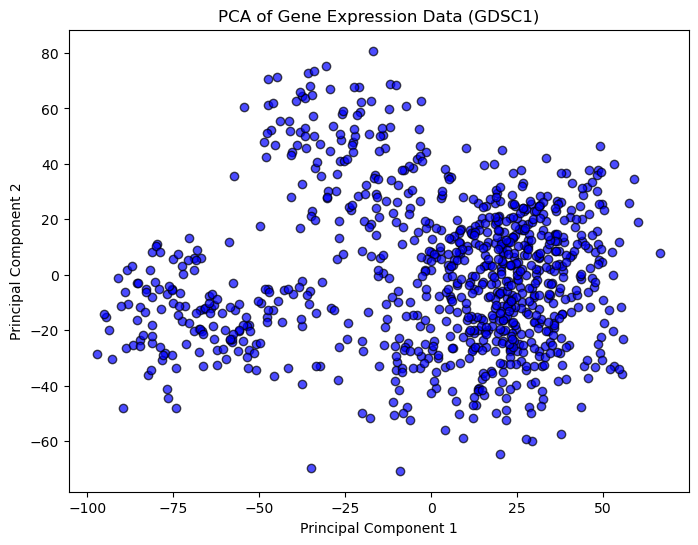

In [120]:
# Dimensionality reduction for gene expression
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_expressions_scaled)

# Visualization of PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA of Gene Expression Data (GDSC1)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Upon the analysis of the first PCA with 2 components, it's percetible that 2 is not the optimal number os compnents to explain the variance of the gene expression data. Therefore, to keep enough components to explain most of the variance, but not too many that turn the data redundant, we decided to assess the Explained Variance Plot and Cumulative Explained Variance. These are common methods for the determination of the optimal number of components.

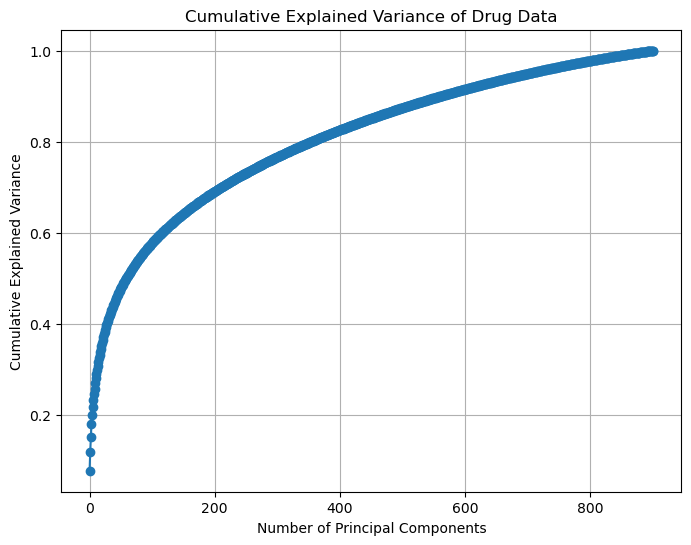

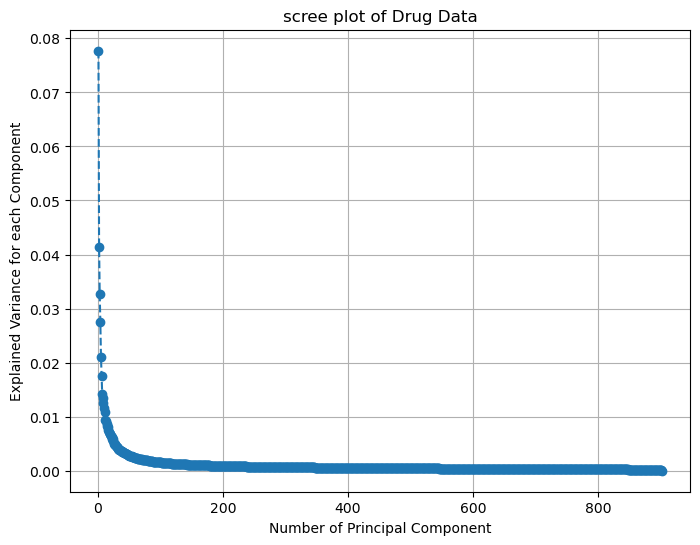

In [90]:
pca2 = PCA()
pca_results = pca2.fit(gene_expressions_scaled)
explained_variance = pca_results.explained_variance_ratio_
cumulative_variance_drugs = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_drugs, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance of Drug Data")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("scree plot of Drug Data")
plt.xlabel("Number of Principal Component")
plt.ylabel("Explained Variance for each Component")
plt.grid(True)
plt.show()

In [91]:
cumulative_variance = np.cumsum(pca2.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance > 0.90) + 1 
print("Number of components to explain 90% of the variance:",n_components)

Number of components to explain 90% of the variance: 562


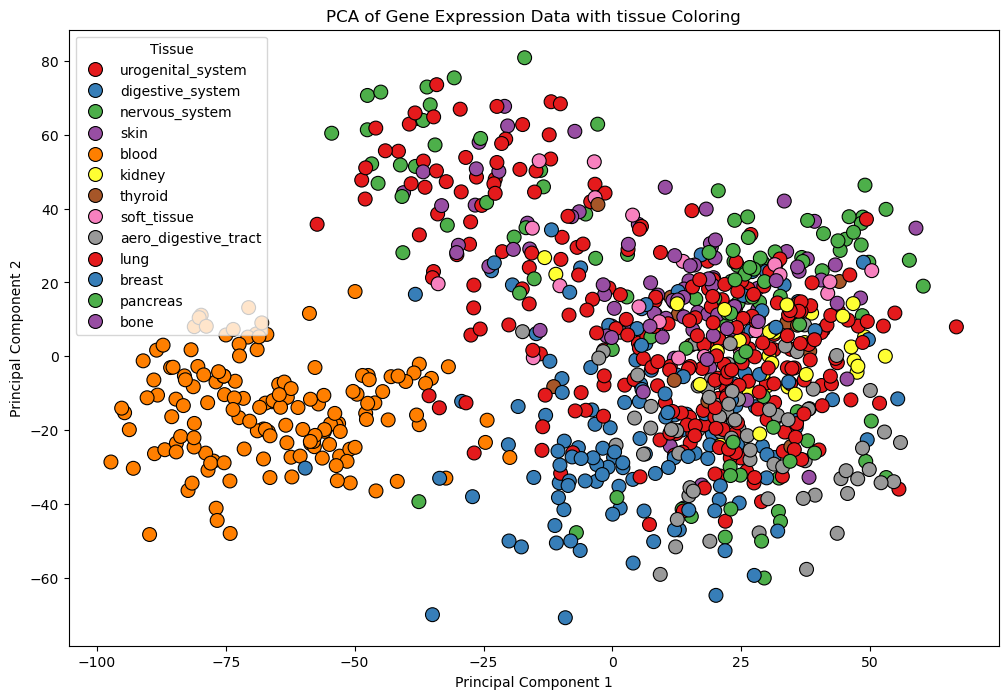

In [92]:
tissue = np.array(filtered_cell_line["Tissue"])
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Tissue"] = tissue

# Plot the PCA with tissue values as the color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Tissue", palette='Set1', s=100, edgecolor='black')
#scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=tissue, cmap='viridis', edgecolor='k')
#plt.colorbar(scatter, label='Tissue')
plt.title("PCA of Gene Expression Data with tissue Coloring")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Tissue')
plt.show()

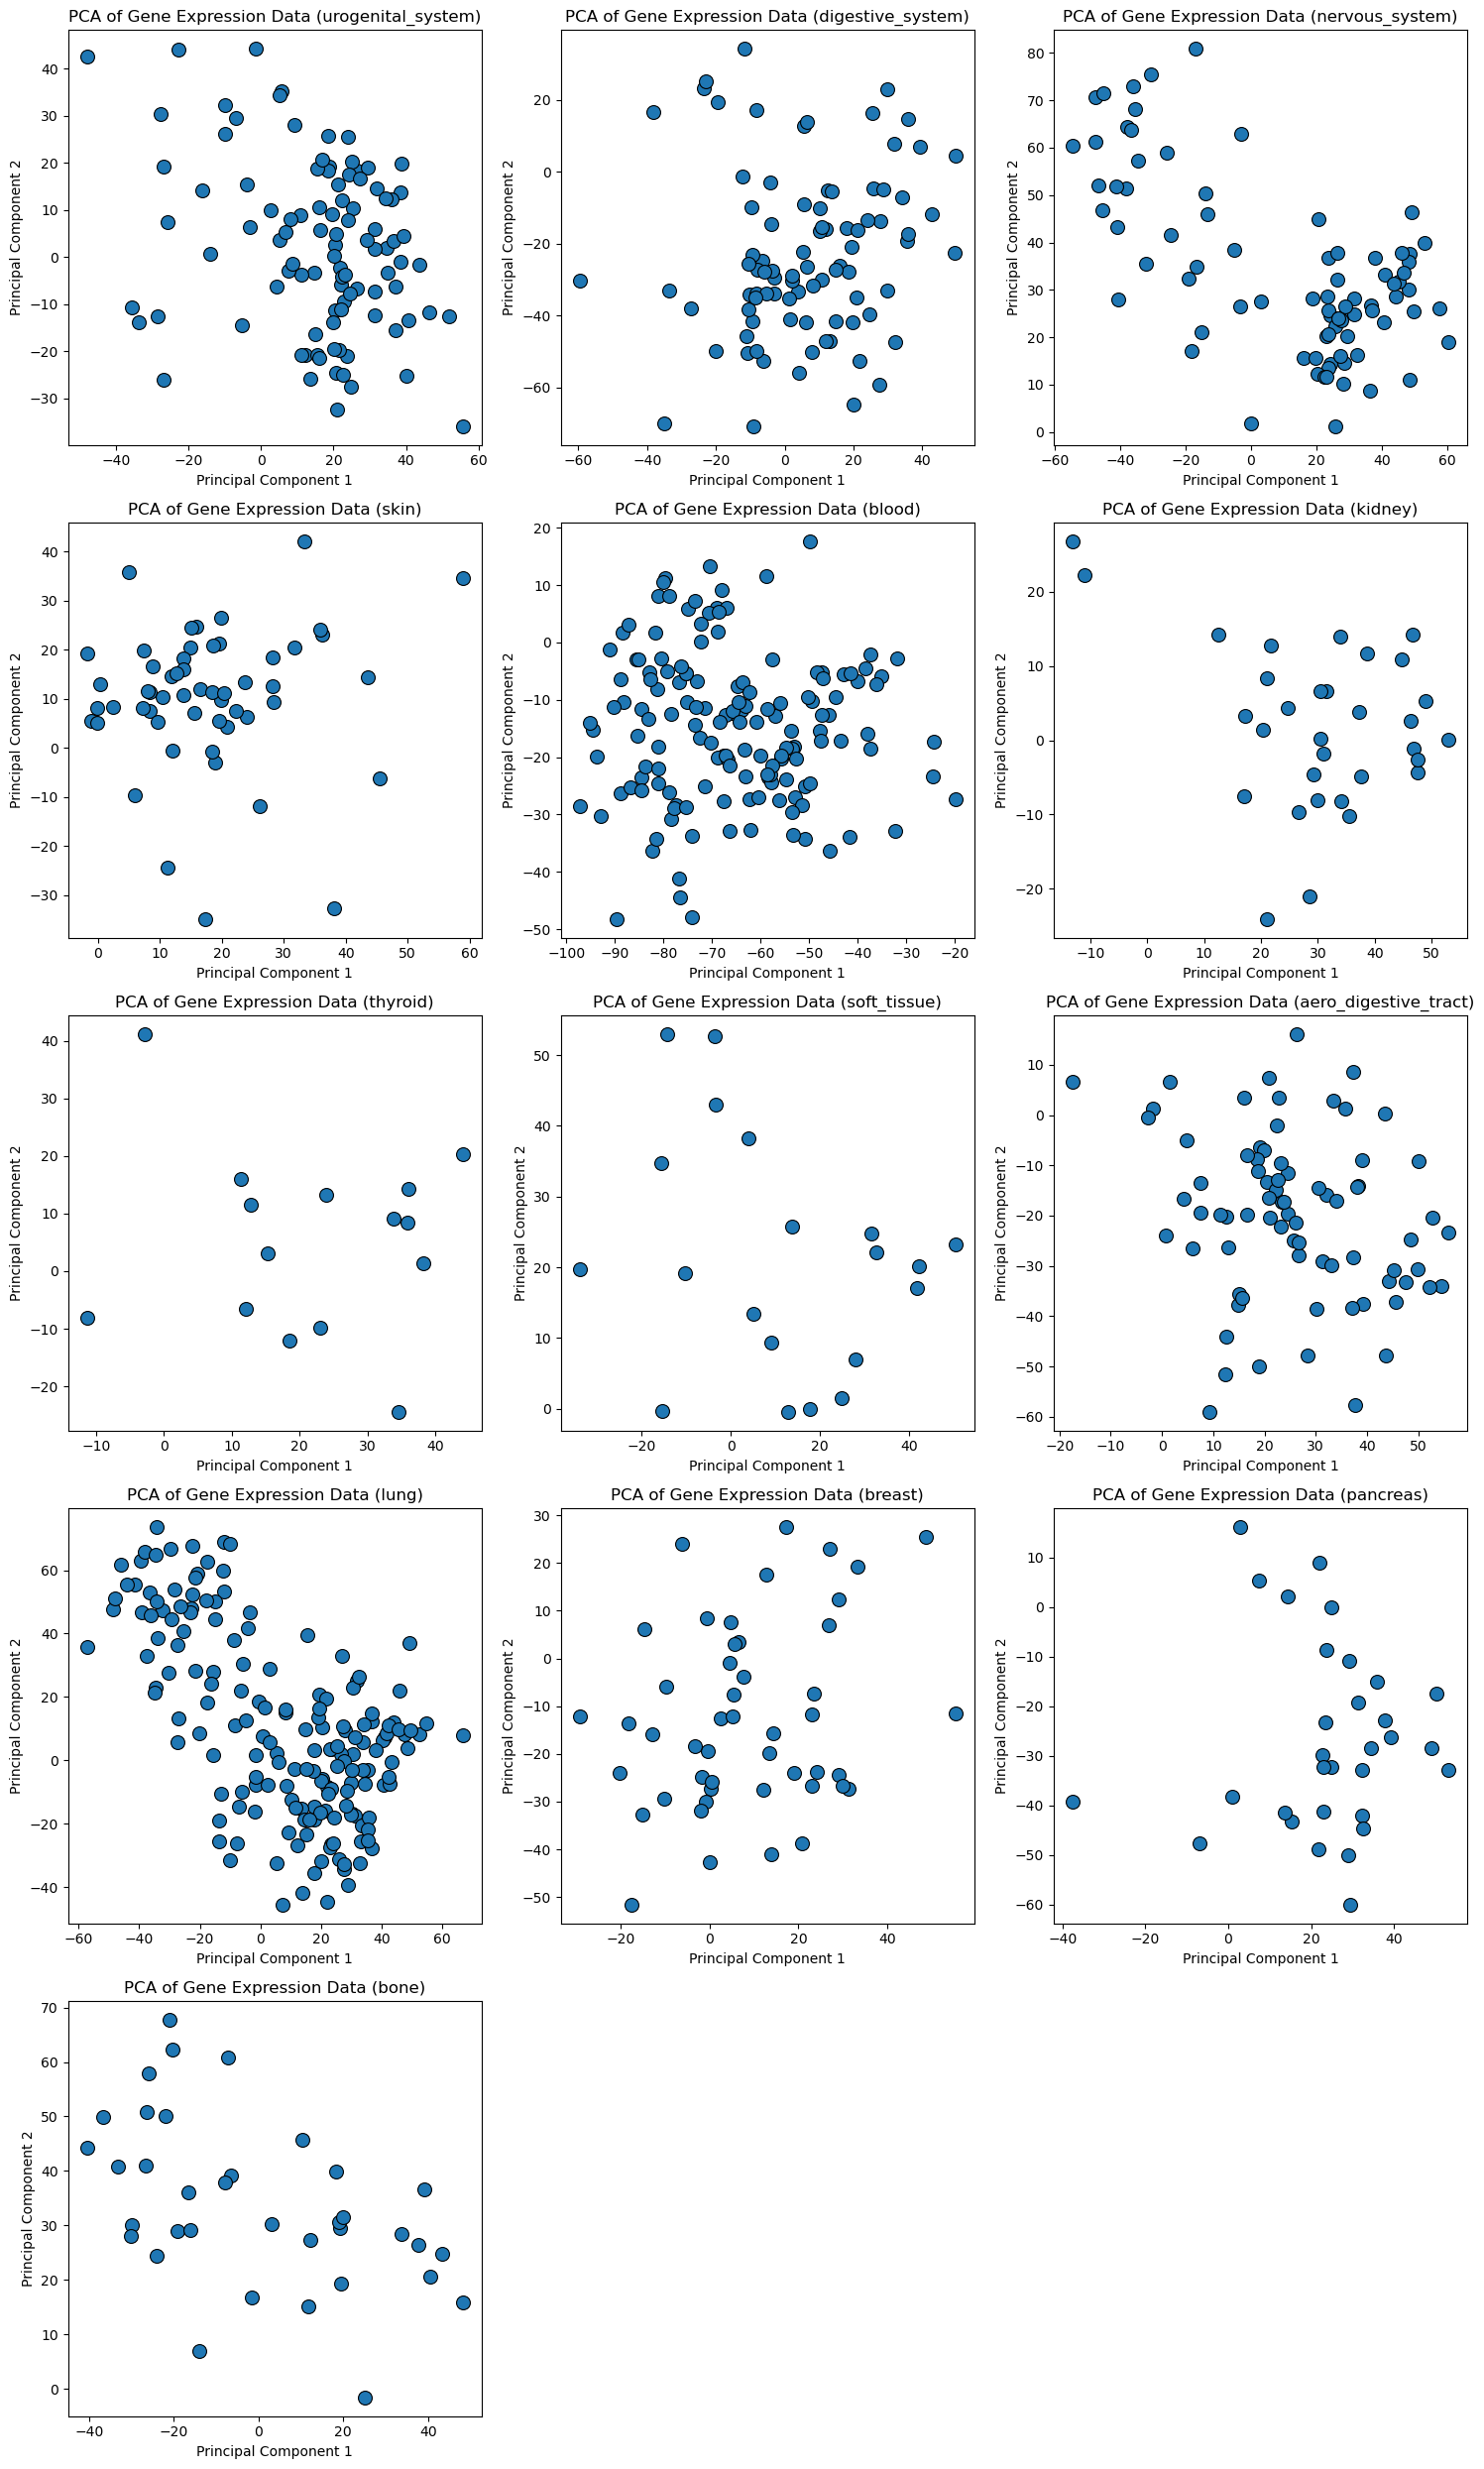

In [93]:
unique_tissues = pca_df["Tissue"].unique()
ncols=3
nrows = int(np.ceil(len(unique_tissues)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, nrows*5))
axes = axes.flatten()
#num_plots=len(unique_tissues)
#fig_height = 3*num_plots
#fig, axes = plt.subplots(num_plots, 1, figsize=(5, fig_height))
for i, tissue in enumerate(unique_tissues):
    tissue_df = pca_df[pca_df["Tissue"] == tissue]
    sns.scatterplot(data=tissue_df, x="PC1", y="PC2", s=100, edgecolor='black', ax=axes[i])
    axes[i].set_title(f"PCA of Gene Expression Data ({tissue})")
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
for i in range(len(unique_tissues), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#ic50 = np.array(filtered_GDSC["Y"])

# Normalize IC50 values for coloring (if IC50 has a wide range of values, it can be normalized)
#normalized_ic50 = (ic50 - ic50.min()) / (ic50.max() - ic50.min())  # Normalizing IC50 to a [0, 1] range

#plt.figure(figsize=(12, 8))
# Plot the PCA with IC50 values as the color
#scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=normalized_ic50, cmap='Set1', edgecolor='black')
#plt.colorbar(scatter, label='Normalized IC50') 
#plt.title("PCA of Gene Expression Data with IC50 Coloring")
#plt.xlabel("Principal Component 1")
#plt.ylabel("Principal Component 2")
#plt.show()

The methods for the assessment of the optimal number of components indicate that the best number of components to explain the variance of our data is ...

As the PCA requires a numerical input, the molecular fingerprints previously determined will be used. 

In [95]:
fingerprints = np.array(drugs["morgan_fingerprints"])
fingerprints = np.stack(fingerprints)
fingerprints_scaled = StandardScaler().fit_transform(fingerprints)

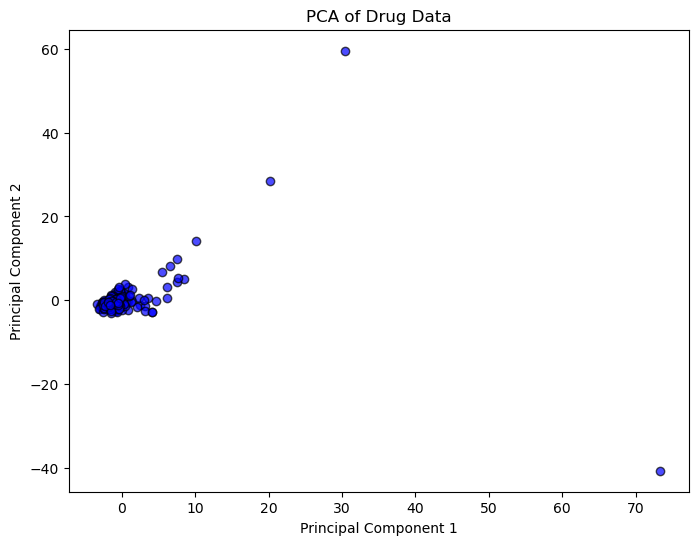

In [96]:
pca_drug = PCA(n_components=2)  # Reducing to 2 components for easier visualization
fingerprints_pca = pca_drug.fit_transform(fingerprints_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_pca[:, 0], fingerprints_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA of Drug Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

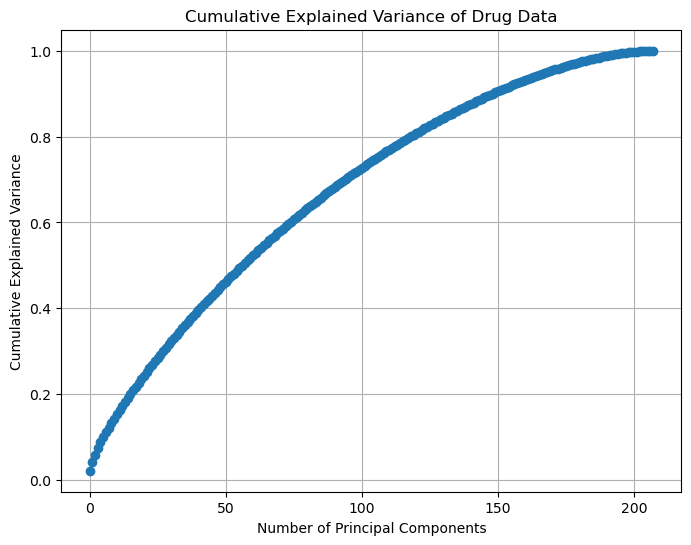

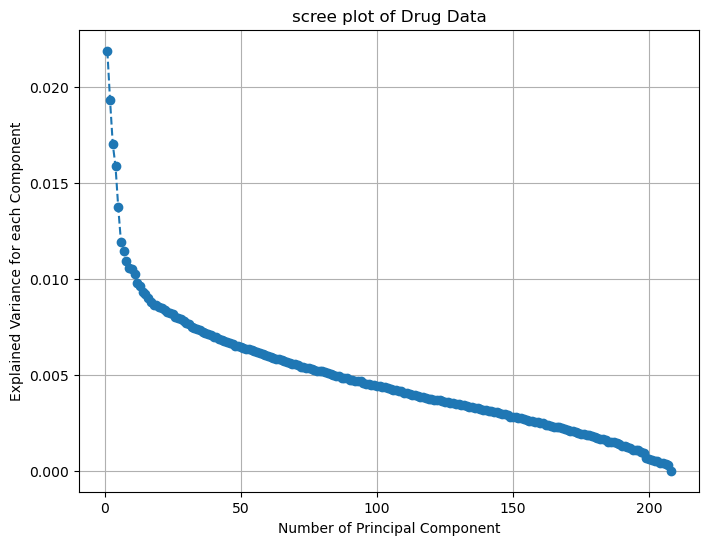

In [97]:
pca_drugs = PCA()
pca_drugs.fit(fingerprints_scaled)
explained_variance = pca_drugs.explained_variance_ratio_
cumulative_variance_drugs = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_drugs, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance of Drug Data")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("scree plot of Drug Data")
plt.xlabel("Number of Principal Component")
plt.ylabel("Explained Variance for each Component")
plt.grid(True)
plt.show()


interpretação ...

To visualize how the drug response (IC50) is related to the clustering of samples in the PCA plot, we decided to use the IC50 values to color the points in the PCA plot. This allows to easily assess if the drug response (IC50 values) has any correlation with the clustering patterns in the PCA.

### 2.1.2 t-SNE 

Another dimensionality reduction technique, similar to PCA, but particularly effective for visualizing high-dimensional data in 2D or 3D, is the t-SNE. As the PCA is linear technique, it may be helpful in the identification of potential non-linear relationships between gene expression and drug responses, and, consequentely, uncover hidden patterns within the data, we decided to also perform this technique.

As the t-SNE is also sensible to the scale of the data, the already standardized drugs and gene expression data were used.

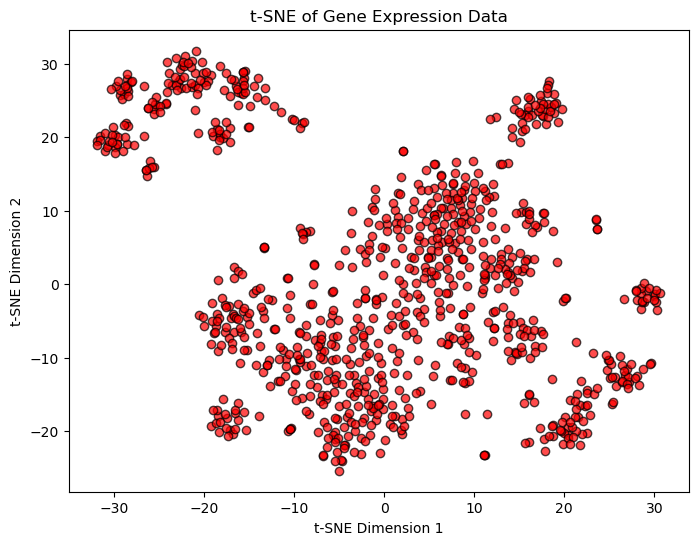

In [98]:
#Apply t-SNE for further visualization of the data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(gene_expressions_scaled)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', edgecolor='k', alpha=0.7)
plt.title("t-SNE of Gene Expression Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

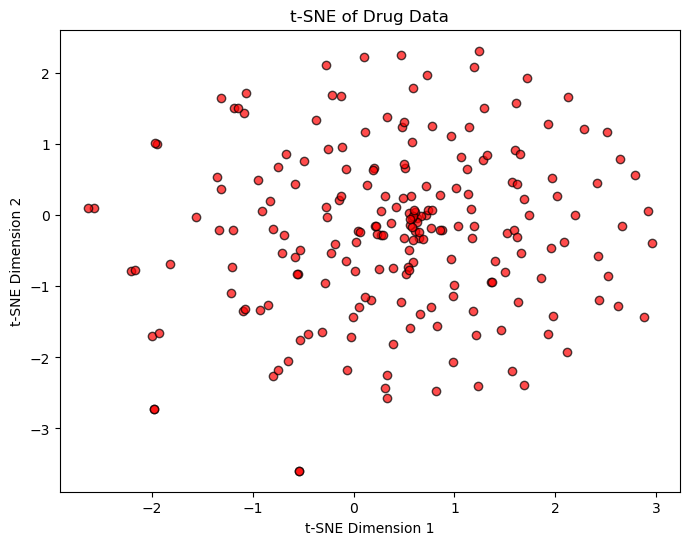

In [99]:
tsne = TSNE(n_components=2, random_state=42)
fingerprints_tsne = tsne.fit_transform(fingerprints_scaled)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], c='red', edgecolor='k', alpha=0.7)
plt.title("t-SNE of Drug Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### 2.1.3 Autoencoders (Unsupervised Neural Networks)

Autoencoders are neural networks used for unsupervised learning that can learn a compact representation of the input data. They are useful for dimensionality reduction and can help capture complex, non-linear relationships between genes and drug responses. 

Due to the fact that Autoencoders have been shown to be able to reveal hidden patterns in the data, capturing important features that are not immediately apparent and that can then be used as input features for the drug response prediction model, we decided to also apply this method to the standardizied gene expression data and morgan fingerprints separately.

In [100]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 1.2266 - val_loss: 1.0540
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.0296 - val_loss: 0.9641
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.9565 - val_loss: 0.9440
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9491 - val_loss: 0.9336
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9341 - val_loss: 0.9245
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9263 - val_loss: 0.9167
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.9174 - val_loss: 0.9095
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9016 - val_loss: 0.9032
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8951 - val_loss: 0.8969
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8994 - val_loss: 0.8911
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8887 - val_loss: 0.8860
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8836 - val_loss: 0.8810


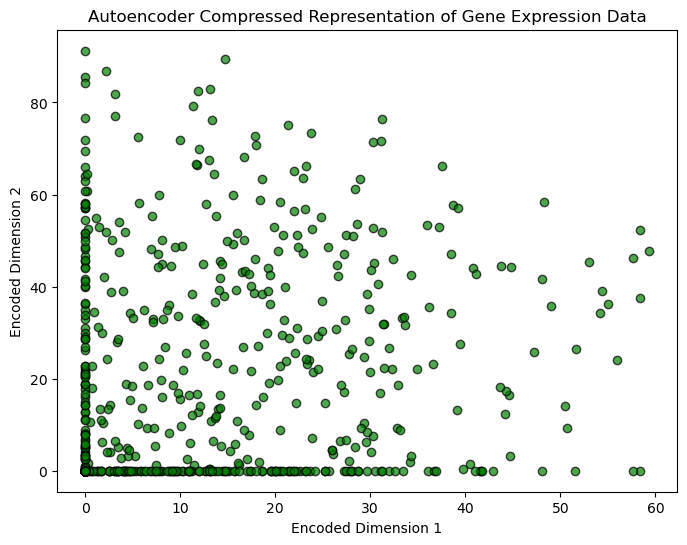

In [101]:
#Creation of an autoencoder to reduce dimensionality and visualize the gene expression data
input_layer = Input(shape=(gene_expressions_scaled.shape[1],))  # Input layer
encoded = Dense(128, activation='relu')(input_layer)  # Compression layer
decoded = Dense(filtered_genes.shape[1], activation='sigmoid')(encoded)  # Reconstruction layer

# Definition the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compilation of the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Training the autoencoder
autoencoder.fit(gene_expressions_scaled, gene_expressions_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(gene_expressions_scaled, gene_expressions_scaled))

# Compression of teh data
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(gene_expressions_scaled)

# Plot of the compressed data from the autoencoder
plt.figure(figsize=(8, 6))
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c='green', edgecolor='k', alpha=0.7)
plt.title("Autoencoder Compressed Representation of Gene Expression Data")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0819 - val_loss: 1.0551
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0551 - val_loss: 0.9779
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.9779 - val_loss: 0.8744
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8744 - val_loss: 0.8351
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.8351 - val_loss: 0.8326
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8326 - val_loss: 0.8325
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8325 - val_loss:

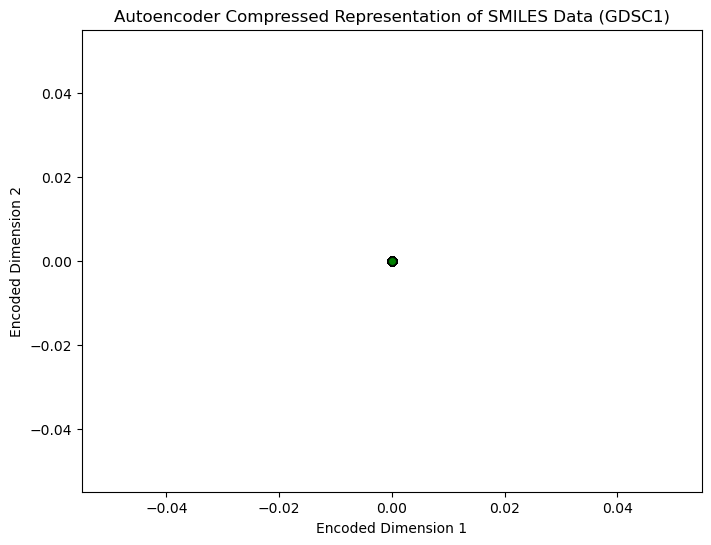

In [102]:
#Creation of an autoencoder to reduce dimensionality and visualize the gene expression data
input_layer = Input(shape=(fingerprints_scaled.shape[1],))  # Number of features (2048)

# Define the encoder part (compression)
encoded = Dense(1024, activation='relu')(input_layer)  # First hidden layer
encoded = Dense(512, activation='relu')(encoded)  # Second hidden layer
encoded = Dense(128, activation='relu')(encoded)  # Third hidden layer

# Define the decoder part (reconstruction)
decoded = Dense(512, activation='relu')(encoded)  # First hidden layer
decoded = Dense(1024, activation='relu')(decoded)  # Second hidden layer
decoded = Dense(fingerprints_scaled.shape[1], activation='sigmoid')(decoded)  # Output layer (same as input)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Create the encoder model (for extracting compressed representation)
encoder = Model(input_layer, encoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 4: Train the Autoencoder
autoencoder.fit(fingerprints_scaled, fingerprints_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(fingerprints_scaled, fingerprints_scaled))

# Step 5: Get the compressed representation (encoded data)
encoded_fingerprints = encoder.predict(fingerprints_scaled)

# Step 6: Visualize the compressed representation
plt.figure(figsize=(8, 6))
plt.scatter(encoded_fingerprints[:, 0], encoded_fingerprints[:, 1], c='green', edgecolor='k', alpha=0.7)
plt.title("Autoencoder Compressed Representation of SMILES Data (GDSC1)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

## 2.2 Clustering Methods

Clustering methods are used to uncover hidden patterns or groupings in the data, which might indicate biological relevance, such as similar mechanisms of action among drugs or cellular responses. In this case, Clustering will be used to group similar cell lines and drugs based on their characteristics, allowing the identification of potential subgroups of cell lines that may respond similarly to drugs, of groups of drugs with similar effects across the range of cell lines, or potentially cancer subtypes or drug classes that were not previously apparent.

Based on the GDSC1 dataset characteristics, mainly on its high-dimensionality, clustering algorithms such as K-Means,  and Hierarchical Clustering are the most appropriate to be appiled to the gene expression and drug characteristics and drug response data. 


### 2.2.1 K-means clustering

K-means is a partitioning method that divides data into a specified number of clusters. It's computationally efficient, making it suitable for our large dataset, and it can handle high-dimensional data, which is crucial for both gene expression profiles and SMILES representations.

K-means Clustering will be applied to both gene expression profiles and SMILES representations to group cell lines with similar gene expression patterns and drugs based on their chemical properties (through the SMILES data).



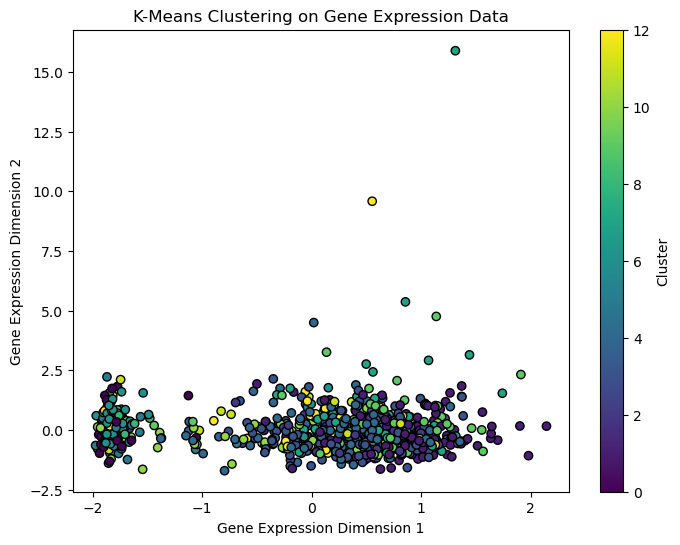

In [105]:
# Clustering for gene expression
kmeans = KMeans(n_clusters=13, random_state=42)
gene_expression_clusters = kmeans.fit_predict(gene_expressions_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(gene_expressions_scaled[:, 0], gene_expressions_scaled[:, 1], c=gene_expression_clusters, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on Gene Expression Data")
plt.xlabel("Gene Expression Dimension 1")
plt.ylabel("Gene Expression Dimension 2")
plt.colorbar(label='Cluster')
plt.show()


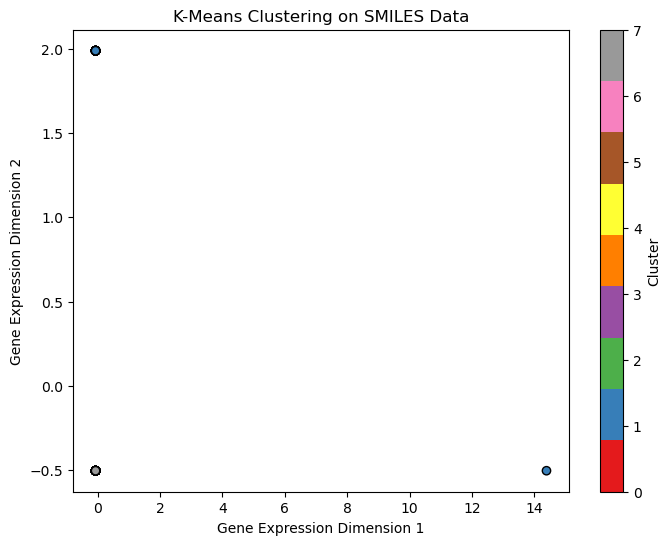

In [106]:
# Clustering for drugs (SMILES data)
kmeans = KMeans(n_clusters=8, random_state=42)
drug_clusters = kmeans.fit_predict(fingerprints_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_scaled[:, 0], fingerprints_scaled[:, 1], c=drug_clusters, cmap='Set1', edgecolor='k')
plt.title("K-Means Clustering on SMILES Data")
plt.xlabel("Gene Expression Dimension 1")
plt.ylabel("Gene Expression Dimension 2")
plt.colorbar(label='Cluster')
plt.show()

### 2.2.2 Hierarchical Clustering

Hierarchical clustering constructs a tree-like structure of clusters, known as a dendrogram. This method is particularly suitable for our gene expression data and drug response profiles because it doesn't require a predefined number of clusters, which allows for a more flexible analysis, and because it reveals relationships at various levels of similarity, which is valuable for understanding the complex relationship between gene expression and drug responses.

Hierarchical clustering complements K-means by offering the ability to visualize how cell lines or drugs group together at various levels of detail. It will be applied to identify groups of cell lines with similar gene expression patterns and cluster drugs based on their response profiles across cell lines, potentially uncover cancer subtypes or drug classes that weren't immediately apparent.



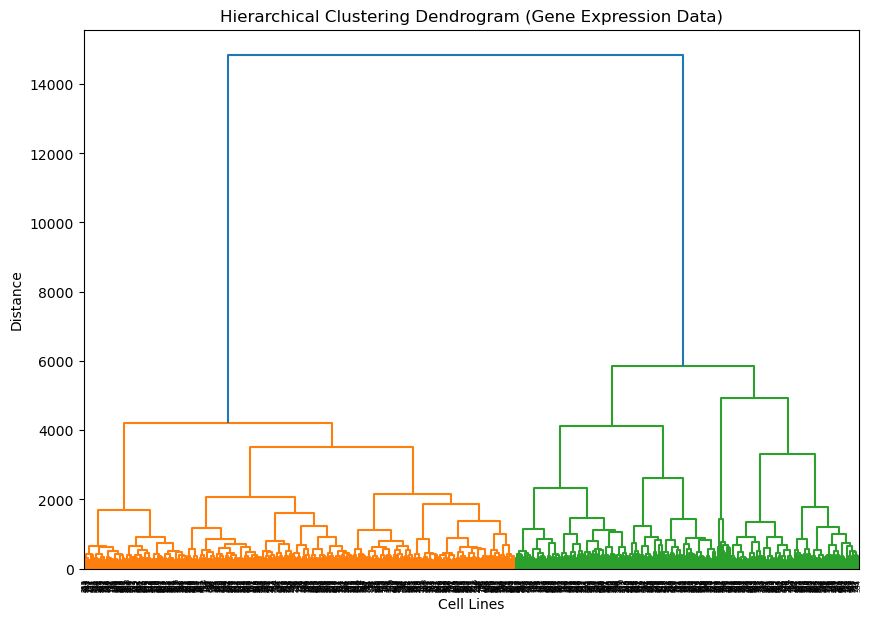

In [107]:
distance_matrix = pairwise_distances(gene_expressions_scaled, metric='euclidean')
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Gene Expression Data)")
plt.xlabel("Cell Lines")
plt.ylabel("Distance")
plt.show()

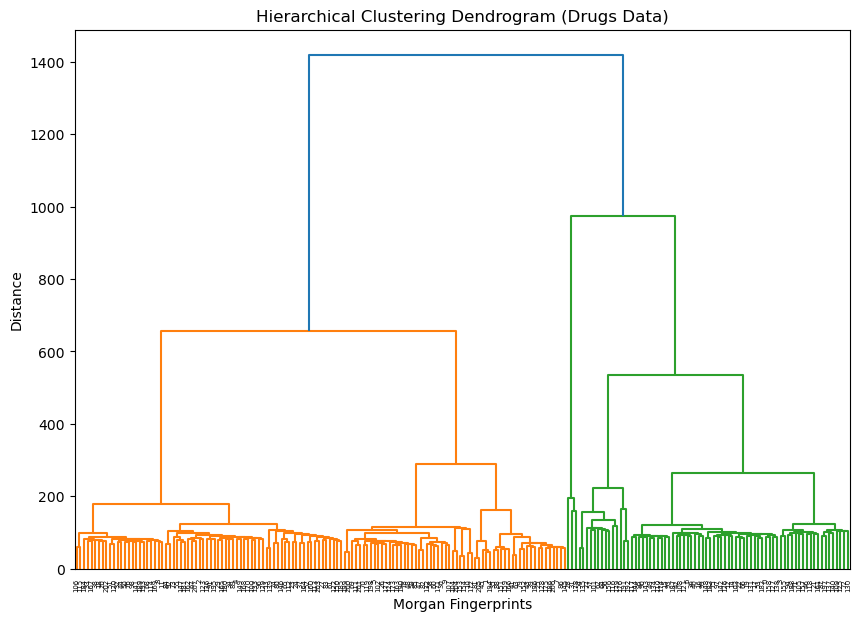

In [108]:
distance_matrix_drugs = pairwise_distances(fingerprints_scaled, metric='euclidean')
linkage_matrix_drugs = linkage(distance_matrix_drugs, method='ward')

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix_drugs)
plt.title("Hierarchical Clustering Dendrogram (Drugs Data)")
plt.xlabel("Morgan Fingerprints")
plt.ylabel("Distance")
plt.show()

interpretation of results...

conclusions...

By using these two methods in combination, we gain a comprehensive understanding of the data's structure. K-means provides a clear, computationally efficient way to partition our data, while hierarchical clustering offers a more nuanced view of relationships between data points. This combination provides sufficient insights to guide the subsequent supervised modeling efforts for predicting drug responses...

# 3. Supervised learning

From all the 213 columns is not likely that all contain snificant information that help the models capture the differences between the compounds and use that knowledge to predict how sensitive a certain cell line will be to a certain drug treatment. Moreover, all the columns that do not contain relevant information for the case in study will only generate noise that will negatively afect the model's performance. In addition, the use of all 213 features to train the models can result in overfitted models due to the high-dimensionality of the data, since high dimension datasets tend to generate overcomplex models that display difficulties to capture patterns, memorizing the training data instead.

To prevent this phenomenon to occur, we decided to select only the most relevant columns by using the `Select Percentile`. First we started by checking if any column had missing values, since Select Percentile can not handle missing values.

## 1ª tentaiva com dados de expressã génica e os morgan fingerprints

In [121]:
# Exemplo de dataset com features (X) e target (y)
X = filtered_GDSC.drop(columns=["Y"])  # Features
y = filtered_GDSC["Y"]  # Valores IC50

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Handle any potential stringified lists (e.g., morgan_fingerprints, gene_expression)
def parse_stringified_list(column):
    return column.apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)

if "morgan_fingerprints" in X.columns:
    X["morgan_fingerprints"] = parse_stringified_list(X["morgan_fingerprints"])
if "Gene_expression" in X.columns:
    X["Gene_expression"] = parse_stringified_list(X["Gene_expression"])

# Concatenate parsed features for complex data
if "morgan_fingerprints" in X.columns:
    morgan_features = np.stack(X.pop("morgan_fingerprints"))
    X = pd.concat([X, pd.DataFrame(morgan_features, index=X.index)], axis=1)
if "Gene_expression" in X.columns:
    gene_expression_features = np.stack(X.pop("Gene_expression"))
    X = pd.concat([X, pd.DataFrame(gene_expression_features, index=X.index)], axis=1)




Train Shape: (136772, 19991) Test Shape: (34194, 19991)


In [138]:
X = pd.DataFrame(data=filtered_GDSC["morgan_fingerprints"])
X["Tissue"] = filtered_GDSC["Tissue"]
X["Gene_expression"] = filtered_GDSC["Gene_expression"]
X["Cell_ID"] = filtered_GDSC["Cell_ID"]
X["Drug_ID"] = filtered_GDSC["Drug_ID"]
X.head()

,morgan_fingerprints,Tissue,Gene_expression,Cell_ID,Drug_ID
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",bone,"[8.233101127037282, 2.82468731112752, 10.01588...",ES5,Erlotinib
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",bone,"[8.33346622426757, 3.9667571228514302, 9.79399...",ES7,Erlotinib
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",bone,"[8.39134072442845, 2.9683601858810698, 10.2606...",EW-11,Erlotinib
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",bone,"[7.87618818572121, 2.8485457282491, 9.28592458...",SK-ES-1,Erlotinib
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",skin,"[7.174121760472291, 2.81185067636675, 10.22149...",COLO-829,Erlotinib


In [149]:
# Converter 'morgan_fingerprints' e 'Gene_expression' em arrays
X["morgan_fingerprints"] = X["morgan_fingerprints"].apply(lambda x: np.array(x))
X["Gene_expression"] = X["Gene_expression"].apply(lambda x: np.array(x))

# Verificar dimensões
print("Dimensão de um vetor de fingerprints:", X["morgan_fingerprints"].iloc[0].shape)
print("Dimensão de um vetor de expressão gênica:", X["Gene_expression"].iloc[0].shape)


Dimensão de um vetor de fingerprints: (2048,)
Dimensão de um vetor de expressão gênica: (17737,)


In [150]:
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas
le_tissue = LabelEncoder()
le_cell = LabelEncoder()
le_drug = LabelEncoder()

X["Tissue"] = le_tissue.fit_transform(X["Tissue"])
X["Cell_ID"] = le_cell.fit_transform(X["Cell_ID"])
X["Drug_ID"] = le_drug.fit_transform(X["Drug_ID"])

print("Exemplo de 'Tissue' codificado:", X["Tissue"].unique())


Exemplo de 'Tissue' codificado: [ 2  9  7  6 10  0  3  1 12  5  8  4 11]


In [151]:
# Concatenar as features numéricas
X_numeric = np.hstack([
    np.vstack(X["morgan_fingerprints"]),  # Vetores de fingerprints
    np.vstack(X["Gene_expression"]),      # Vetores de expressão gênica
    X[["Tissue", "Cell_ID", "Drug_ID"]].values  # Colunas categóricas codificadas
])

print("Formato final de X:", X_numeric.shape)


Formato final de X: (170966, 19788)


In [155]:
X_numeric

array([[  0.,   0.,   0., ...,   2., 185.,  63.],
       [  0.,   0.,   0., ...,   2., 187.,  63.],
       [  0.,   0.,   0., ...,   2., 195.,  63.],
       ...,
       [  0.,   0.,   0., ...,   4., 793., 129.],
       [  0.,   0.,   0., ...,   4., 794., 129.],
       [  0.,   0.,   0., ...,   4., 797., 129.]])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predições e métricas
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

ValueError: setting an array element with a sequence.

In [156]:
# Modelo de XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost.fit(X_train, y_train)

# Predições e métricas
y_pred_xgb = xgboost.predict(X_test)
print("\nXGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:morgan_fingerprints: object, Gene_expression: object

In [157]:
# Modelo de MLP
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predições e métricas
y_pred_mlp = mlp.predict(X_test)
print("\nMLP:")
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R2 Score:", r2_score(y_test, y_pred_mlp))

ValueError: setting an array element with a sequence.

In [ ]:
# Comparação dos resultados
results = {
    "Model": ["Random Forest", "XGBoost", "MLP"],
    "MSE": [
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_mlp)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_mlp)
    ],
}

results_df = pd.DataFrame(results)
print(results_df)

## 2ª tentativa com o filtered_GDSC

In [158]:
dataset_final = filtered_GDSC.select_dtypes(include=float)
dataset_final

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,MaxPartialCharge,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,MolLogP,MolMR,Y
0,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,3.968757
1,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.692768
2,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.478678
3,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.034050
4,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,0.162995,...,2.343161,4.443107,11.258046,6.994191,1.725695,3.250034,0.272727,3.4051,111.9397,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170961,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.353963
170962,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,4.820567
170963,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.785978
170964,12.220360,12.220360,0.024463,-0.169023,0.692307,22.500000,321.380,302.228,321.147727,0.190493,...,0.340943,0.882212,13.464916,6.339041,1.822014,0.000000,0.263158,2.4467,92.0593,5.393454


In [159]:
selector = VarianceThreshold(threshold=0.05)
selected_dataset = selector.fit_transform(dataset_final)
selected_columns = dataset_final.columns[selector.get_support()]
dataset_filtrado = pd.DataFrame(selected_dataset, columns=selected_columns)

In [161]:
dataset_filtrado.shape

(170966, 89)

In [166]:
tissue_data = filtered_GDSC['Tissue']
morgan_fingerprints = filtered_GDSC['morgan_fingerprints']
morgan_encodings = np.vstack(morgan_fingerprints)
morgan_columns = [f'morgan_{i}' for i in range(morgan_encodings.shape[1])]
morgan_df = pd.DataFrame(morgan_encodings, columns=morgan_columns)
one_hot_encoder = OneHotEncoder(sparse_output=False)
tissue_encodings = one_hot_encoder.fit_transform(tissue_data.values.reshape(-1, 1))
tissue_columns = [f'tissue_{cat}' for cat in one_hot_encoder.categories_[0]]
tissue_df = pd.DataFrame(tissue_encodings, columns=tissue_columns)
augmented_data = pd.concat([dataset_filtrado, morgan_df, tissue_df], axis=1)

In [167]:
target_data = augmented_data['Y'].values  
augmented_data = augmented_data.drop(columns=['Y'])  


print(f"Linhas no dataset augmentado (X): {augmented_data.shape[0]}, Colunas: {augmented_data.shape[1]}")
print(f"Linhas no target_data (Y): {target_data.shape[0]}")

Linhas no dataset augmentado (X): 170966, Colunas: 2149
Linhas no target_data (Y): 170966


In [168]:
X_train, X_test, y_train, y_test = train_test_split(augmented_data.values, target_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [169]:
# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predições e métricas
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
MSE: 2.73211225752053
R2 Score: 0.6278345873584524


In [170]:
# Modelo de XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost.fit(X_train, y_train)

# Predições e métricas
y_pred_xgb = xgboost.predict(X_test)
print("\nXGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MSE: 1.781701034132821
R2 Score: 0.7572985887579582


In [171]:
# Modelo de MLP
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predições e métricas
y_pred_mlp = mlp.predict(X_test)
print("\nMLP:")
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R2 Score:", r2_score(y_test, y_pred_mlp))


MLP:
MSE: 1.7504170825761995
R2 Score: 0.7615600552142064


In [173]:
# Comparação dos resultados
results = {
    "Model": ["Random Forest", "XGBoost", "MLP"],
    "MSE": [
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_mlp),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_mlp),
    ],
}

results_df = pd.DataFrame(results)
print(results_df)

           Model       MSE  R2 Score
0  Random Forest  2.732112  0.627835
1        XGBoost  1.781701  0.757299
2            MLP  1.750417  0.761560
